<a href="https://colab.research.google.com/github/ferrazzijk/Data-Industry-Salary-Prediction/blob/main/07_Data_Industry_Salary_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The purpose of this project is to determine which data analysis skills are associated with higher salaries. We will use data scraped from [Glassdoor](https://www.glassdoor.com/member/home/index.htm). This file contains the model building and testing portions for the first 4 dataframes of the project. To view the scraping files of each role, please select the respective link in the Job Titles list. To view scraping exploration or the exploratory data analysis notebooks, please select the respective link from additional links.

**Job Titles:**
*   [Data Analyst](https://colab.research.google.com/drive/1AW0rNTs84Cq7GrJiDq86WWCisB4q6ZwO?usp=sharing)
*   [Business Analyst](https://colab.research.google.com/drive/1I1lolzuZgoUZGBwAEP9hZNf7my8XItbz?usp=sharing)
*   [Data Engineer](https://colab.research.google.com/drive/18HMhZXcv4xwxDUXGDauYEGdnDJLjNYxf?usp=sharing)
*   [Data Scientist](https://colab.research.google.com/drive/1i8UQMiObiOKAyzlrAsFCBPitqIh90Y5O?usp=sharing)

**Locations**
*   Austin, TX
*   Boston, MA
*   Chicago, IL
*   Colorado
*   Los Angeles, CA
*   New York City, NY
*   San Francisco, CA
*   Seattle, WA

**Additional Links**
*    [Scraping Exploration](https://colab.research.google.com/drive/1K1VMiRG_wzVm0wBSyBHoJJ77rSpZM-wf?usp=sharing)
*    [Exploratory Data Analysis](https://colab.research.google.com/drive/1lDlqmcv6xav48C5uj2YLJwK5UJ3BNYET?usp=sharing)
*    [Model Building & Testing Part 1](https://colab.research.google.com/drive/17wVHuX5pFcVi2V_r_11FdT1pVpzP8Dnw?usp=sharing)
*    [Model Building & Testing Part 2](https://colab.research.google.com/drive/1AyO8kZANyqWAacCn7Odrt5DhW9ZkAZEU?usp=sharing)

## **Set Environment**

In [ ]:
#set environment
import collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import scipy.stats as stats
import seaborn as sns
import spacy
import statsmodels.api as sm
import string
import textwrap

from bs4 import BeautifulSoup as soup
from collections import Counter
from IPython.core.display import clear_output
from nltk.corpus import stopwords
from random import randint
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import text
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost.sklearn import XGBRegressor
from statsmodels.tools.eval_measures import mse, rmse
from time import time, sleep
from wordcloud import WordCloud

nltk.download('stopwords')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Model Building & Testing**

We have 8 Dataframe's to test models on (developed in EDA notebook). The first four were tested in another notebook and the second four in this notebook.
*   **all_jobs:** numeric data of extrapolated from the job descriptions. 5631 rows × 88 columns
*   **all_jobs_yrs_df**: all_jobs excluding jobs that did not have years of experience listed. 4696 rows × 88 columns
*   **all_jobs_no_outliers_df:** numeric data of extrapolated from the job descriptions, outliers removed. 5569 rows × 88 columns
*   **all_jobs_yrs_no_outliers_df**: ll_jobs excluding jobs that did not have years of experience listed, outliers removed. 4644 rows × 88 columns
*   **categories_df:** numeric data of combined sums of the categories we extrapolated from the job descriptions. 4696 rows × 16 columns
*   **yrs_exp_df**: categories excluding jobs that did not have years of experience listed. 1711 rows × 16 columns
*   **cat_no_outliers_df:** numeric data of combined sums of the categories we extrapolated from the job descriptions, outliers removed. 5569 rows × 16 columns
*   **yrs_exp_no_outliers_df**: categories excluding jobs that did not have years of experience listed, outliers removed. 4644 rows × 16 columns

For performance comparison, each will be tested with target variable as:
*    **Average Salary**
*    **Log of Average Salary**

### **Import Created Databases**

In [ ]:
all_jobs_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/all_jobs_df.csv?dl=0')
all_jobs_no_outliers_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/all_jobs_no_outliers_df.csv?dl=0') 
categories_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/categories_df.csv?dl=0')
yrs_exp_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/yrs_exp_df.csv?dl=0')
cat_no_outliers_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/cat_no_outliers_df.csv?dl=0')
yrs_exp_no_outliers_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/yrs_exp_no_outliers_df.csv?dl=0')

dfs = [all_jobs_df, all_jobs_no_outliers_df, categories_df, yrs_exp_df, cat_no_outliers_df, yrs_exp_no_outliers_df]
for df in dfs:
  df.drop(columns=['Unnamed: 0'], inplace=True)
  print(df.head())

   industry  rank  search_city  search_job  ...  keras  neural  spark  tensorflow
0         5   3.5            0           1  ...      0       0      1           0
1        12   3.4            0           1  ...      0       0      0           0
2         1   3.8            0           1  ...      0       0      0           0
3         5   4.5            0           1  ...      0       0      0           0
4         5   3.7            0           1  ...      0       0      0           0

[5 rows x 88 columns]
   industry  rank  search_city  search_job  ...  keras  neural  spark  tensorflow
0         5   3.5            0           1  ...      0       0      1           0
1        12   3.4            0           1  ...      0       0      0           0
2         1   3.8            0           1  ...      0       0      0           0
3         5   4.5            0           1  ...      0       0      0           0
4         5   3.7            0           1  ...      0       0      0      

### **Visualization of Target Variable**

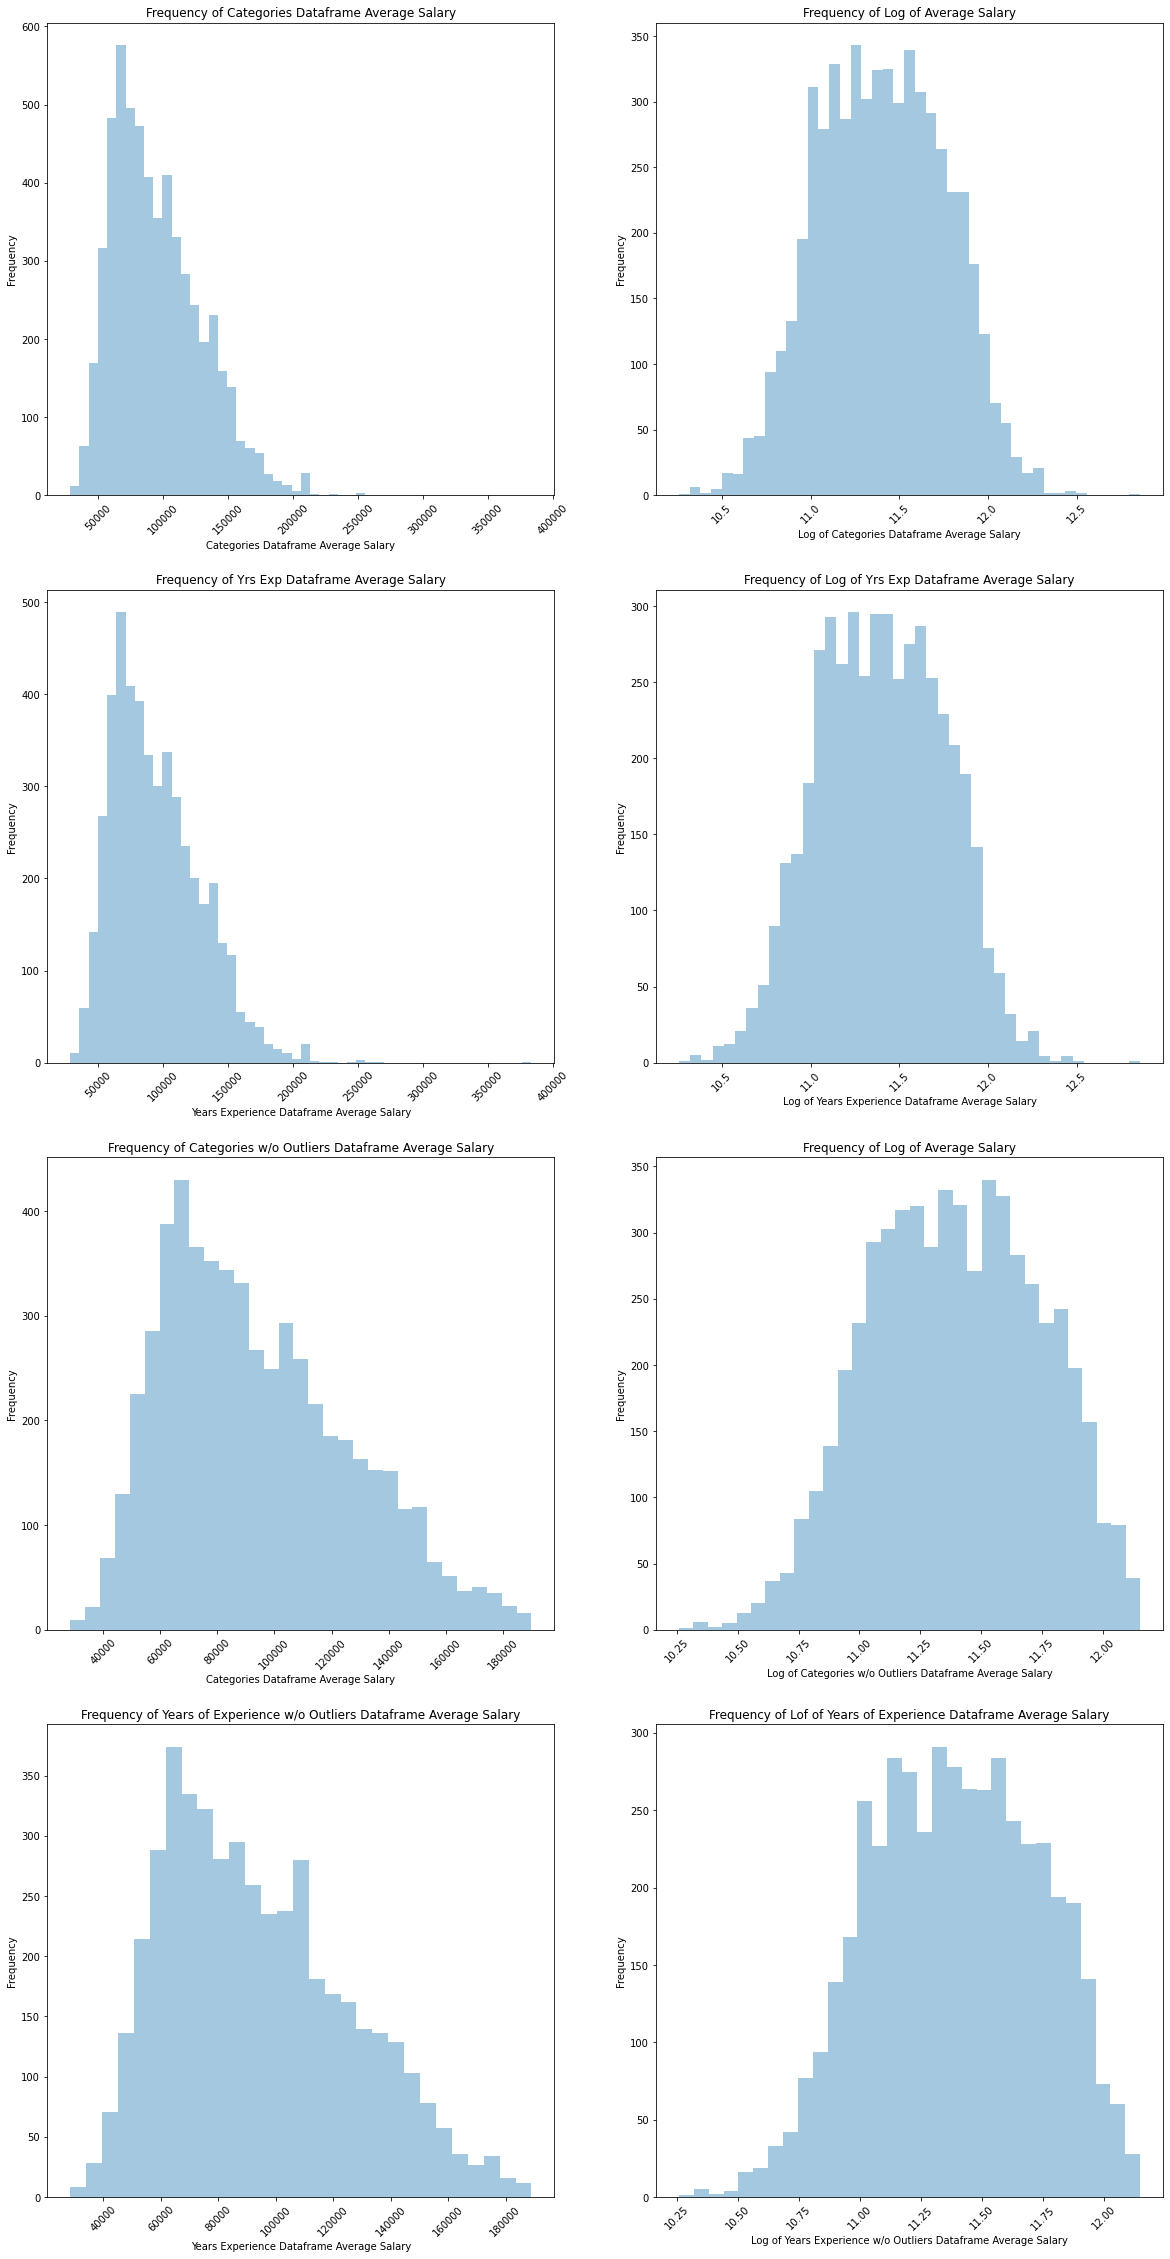

In [ ]:
#visualize Categories Dataframe Average Salary
plt.figure(figsize = (20,40))
plt.subplot(421)
sns.distplot(categories_df['avg_sal'], kde = False)
plt.xlabel('Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Categories Dataframe Average Salary')
plt.xticks(rotation = 45)

plt.subplot(422)
#visualize Log of Categories Dataframe Average Salary
sns.distplot(categories_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Average Salary')
plt.xticks(rotation = 45)

#visualize Years Experience Dataframe Average Salary
plt.subplot(423)
sns.distplot(yrs_exp_df['avg_sal'], kde = False)
plt.xlabel('Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Yrs Exp Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of Years Experience Dataframe Average Salary
plt.subplot(424)
sns.distplot(yrs_exp_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Yrs Exp Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Categories w/o Outliers Dataframe Average Salary
plt.subplot(425)
sns.distplot(cat_no_outliers_df['avg_sal'], kde = False)
plt.xlabel('Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Categories w/o Outliers Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of Categories w/o Outliers Dataframe Average Salary
plt.subplot(426)
sns.distplot(cat_no_outliers_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Categories w/o Outliers Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Average Salary')
plt.xticks(rotation = 45)

#visualize Years Experience w/o Outliers Dataframe Average Salary
plt.subplot(427)
sns.distplot(yrs_exp_no_outliers_df['avg_sal'], kde = False)
plt.xlabel('Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Years of Experience w/o Outliers Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of Years Experience w/o Outliers Dataframe Average Salary
plt.subplot(428)
sns.distplot(yrs_exp_no_outliers_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Years Experience w/o Outliers Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Lof of Years of Experience Dataframe Average Salary')
plt.xticks(rotation = 45)
plt.show()

## **Linear Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
categories_lr = LinearRegression()

#fit model
categories_lr.fit(X_train, y_train)

#cross validate
categories_lr_cv_scores = cross_val_score(categories_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', categories_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.47747096 0.4943998  0.44797259 0.44170988 0.44971746]
Mean Cross Validation Score: 0.462254139085281567922436352091609


In [ ]:
#generate predictions
categories_lr_preds = categories_lr.predict(X_test)

#get performance metrics
categories_lr_rsquared_train = categories_lr.score(X_train, y_train)
categories_lr_rsquared_test = categories_lr.score(X_test, y_test)
categories_lr_mae = mean_absolute_error(y_test, categories_lr_preds)
categories_lr_mse = mse(y_test, categories_lr_preds)
categories_lr_rmse = rmse(y_test, categories_lr_preds)
categories_lr_mape = np.mean(np.abs((y_test - categories_lr_preds)/y_test)*100)
categories_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_lr_preds) / y_test)))) * 100
categories_lr_model_name = 'Categories Linear Regression'

#create easily readable display of performance metrics
categories_lr_dictionary = {'Model': categories_lr_model_name,
  'Training Set R Squared': categories_lr_rsquared_train, 
  'Test Set R Squared': categories_lr_rsquared_test, 'Mean Absolute Error': categories_lr_mae, 
  'Mean Sqaured Error': categories_lr_mse, 'Root Mean Squared Error': categories_lr_rmse,
  'Root Mean Squared Percentage Error': categories_lr_rmspe,
  'Mean Absolute Percentage Error': categories_lr_mape}

categories_lr_df = pd.DataFrame(categories_lr_dictionary, index=[0])

categories_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression,0.466434,0.495073,18351.913297,6.133575e+08,24766.055624,28.20096,20.51033


### **yrs_exp_df**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
yrs_exp_lr = LinearRegression()

#fit model
yrs_exp_lr.fit(X_train, y_train)

#cross validate
yrs_exp_lr_cv_scores = cross_val_score(yrs_exp_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', yrs_exp_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.44512548 0.49210364 0.51494067 0.46660633 0.49496809]
Mean Cross Validation Score: 0.482748841300707387524937530542957


In [ ]:
#generate predictions
yrs_exp_lr_preds = yrs_exp_lr.predict(X_test)

#get performance metrics
yrs_exp_lr_rsquared_train = yrs_exp_lr.score(X_train, y_train)
yrs_exp_lr_rsquared_test = yrs_exp_lr.score(X_test, y_test)
yrs_exp_lr_mae = mean_absolute_error(y_test, yrs_exp_lr_preds)
yrs_exp_lr_mse = mse(y_test, yrs_exp_lr_preds)
yrs_exp_lr_rmse = rmse(y_test, yrs_exp_lr_preds)
yrs_exp_lr_mape = np.mean(np.abs((y_test - yrs_exp_lr_preds)/y_test)*100)
yrs_exp_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lr_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Linear Regression'

#create easily readable display of performance metrics
yrs_exp_lr_dictionary = {'Model': yrs_exp_model_name,
  'Training Set R Squared': yrs_exp_lr_rsquared_train, 
  'Test Set R Squared': yrs_exp_lr_rsquared_test, 'Mean Absolute Error': yrs_exp_lr_mae, 
  'Mean Sqaured Error': yrs_exp_lr_mse, 'Root Mean Squared Error': yrs_exp_lr_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lr_rmspe,  
  'Mean Absolute Percentage Error': yrs_exp_lr_mape}

yrs_exp_lr_df = pd.DataFrame(yrs_exp_lr_dictionary, index=[0])

yrs_exp_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Linear Regression,0.488129,0.510405,18185.446291,5.860383e+08,24208.228943,29.67586,21.273419


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_categories_lr = LinearRegression()

#fit model
log_categories_lr.fit(X_train, y_train)

#cross validate
log_categories_lr_cv_scores = cross_val_score(log_categories_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_categories_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.48849635 0.50662567 0.45688914 0.4859955  0.46705575]
Mean Cross Validation Score: 0.481012483187568951059631672251271


In [ ]:
#generate predictions
log_categories_lr_preds = log_categories_lr.predict(X_test)

#get performance metrics
log_categories_lr_rsquared_train = log_categories_lr.score(X_train, y_train)
log_categories_lr_rsquared_test = log_categories_lr.score(X_test, y_test)
log_categories_lr_mae = mean_absolute_error(y_test, log_categories_lr_preds)
log_categories_lr_mse = mse(y_test, log_categories_lr_preds)
log_categories_lr_rmse = rmse(y_test, log_categories_lr_preds)
log_categories_lr_mape = np.mean(np.abs((y_test - log_categories_lr_preds)/y_test)*100)
log_categories_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_lr_preds) / y_test)))) * 100
log_categories_lr_model_name = 'Categories Linear Regression Log(y)'

#create easily readable display of performance metrics
log_categories_lr_dictionary = {'Model': log_categories_lr_model_name,
  'Training Set R Squared': log_categories_lr_rsquared_train, 
  'Test Set R Squared': log_categories_lr_rsquared_test, 'Mean Absolute Error': log_categories_lr_mae, 
  'Mean Sqaured Error': log_categories_lr_mse, 'Root Mean Squared Error': log_categories_lr_rmse,
  'Root Mean Squared Percentage Error': log_categories_lr_rmspe,
  'Mean Absolute Percentage Error': log_categories_lr_mape}

log_categories_lr_df = pd.DataFrame(log_categories_lr_dictionary, index=[0])

log_categories_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression Log(y),0.485597,0.510472,0.192234,0.063019,0.251036,2.204655,1.686736


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_yrs_exp_lr = LinearRegression()

#fit model
log_yrs_exp_lr.fit(X_train, y_train)

#cross validate
log_yrs_exp_lr_cv_scores = cross_val_score(log_yrs_exp_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_yrs_exp_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.46642323 0.50349699 0.51884848 0.49696047 0.50718634]
Mean Cross Validation Score: 0.498583104129361687206767328461865


In [ ]:
#generate predictions
log_yrs_exp_lr_preds = log_yrs_exp_lr.predict(X_test)

#get performance metrics
log_yrs_exp_lr_rsquared_train = log_yrs_exp_lr.score(X_train, y_train)
log_yrs_exp_lr_rsquared_test = log_yrs_exp_lr.score(X_test, y_test)
log_yrs_exp_lr_mae = mean_absolute_error(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_mse = mse(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_rmse = rmse(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_mape = np.mean(np.abs((y_test - log_yrs_exp_lr_preds)/y_test)*100)
log_yrs_exp_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_lr_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Linear Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_lr_dictionary = {'Model': yrs_exp_model_name,
  'Training Set R Squared': log_yrs_exp_lr_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_lr_rsquared_test, 'Mean Absolute Error': log_yrs_exp_lr_mae, 
  'Mean Sqaured Error': log_yrs_exp_lr_mse, 'Root Mean Squared Error': log_yrs_exp_lr_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_lr_rmspe,  
  'Mean Absolute Percentage Error': log_yrs_exp_lr_mape}

log_yrs_exp_lr_df = pd.DataFrame(log_yrs_exp_lr_dictionary, index=[0])

log_yrs_exp_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Linear Regression Log(y),0.504237,0.532635,0.191958,0.061039,0.24706,2.188861,1.69237


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
cat_no_outliers_lr = LinearRegression()

#fit model
cat_no_outliers_lr.fit(X_train, y_train)

#cross validate
cat_no_outliers_lr_cv_scores = cross_val_score(cat_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', cat_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.51211293 0.47390418 0.51173921 0.44263675 0.4754572 ]
Mean Cross Validation Score: 0.483170055842179368976729847418028


In [ ]:
#generate predictions
cat_no_outliers_lr_preds = cat_no_outliers_lr.predict(X_test)

#get performance metrics
cat_no_outliers_lr_rsquared_train = cat_no_outliers_lr.score(X_train, y_train)
cat_no_outliers_lr_rsquared_test = cat_no_outliers_lr.score(X_test, y_test)
cat_no_outliers_lr_mae = mean_absolute_error(y_test, cat_no_outliers_lr_preds)
cat_no_outliers_lr_mse = mse(y_test, cat_no_outliers_lr_preds)
cat_no_outliers_lr_rmse = rmse(y_test, cat_no_outliers_lr_preds)
cat_no_outliers_lr_mape = np.mean(np.abs((y_test - cat_no_outliers_lr_preds)/y_test)*100)
cat_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_lr_preds) / y_test)))) * 100
cat_no_outliers_lr_model_name = 'Categories w/o Outliers Linear Regression'

#create easily readable display of performance metrics
cat_no_outliers_lr_dictionary = {'Model': cat_no_outliers_lr_model_name,
  'Training Set R Squared': cat_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_lr_rsquared_test, 'Mean Absolute Error': cat_no_outliers_lr_mae, 
  'Mean Sqaured Error': cat_no_outliers_lr_mse, 'Root Mean Squared Error': cat_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_lr_mape}

cat_no_outliers_lr_df = pd.DataFrame(cat_no_outliers_lr_dictionary, index=[0])

cat_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Linear Regression,0.489295,0.479863,18051.183778,5.362629e+08,23157.350694,28.103161,20.874016


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
yrs_exp_no_outliers_lr = LinearRegression()

#fit model
yrs_exp_no_outliers_lr.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_lr_cv_scores = cross_val_score(yrs_exp_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.51501906 0.541912   0.49844206 0.41408851 0.52705894]
Mean Cross Validation Score: 0.499304115670645753954914880523575


In [ ]:
#generate predictions
yrs_exp_no_outliers_lr_preds = yrs_exp_no_outliers_lr.predict(X_test)

#get performance metrics
yrs_exp_no_outliers_lr_rsquared_train = yrs_exp_no_outliers_lr.score(X_train, y_train)
yrs_exp_no_outliers_lr_rsquared_test = yrs_exp_no_outliers_lr.score(X_test, y_test)
yrs_exp_no_outliers_lr_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_lr_preds)
yrs_exp_no_outliers_lr_mse = mse(y_test, yrs_exp_no_outliers_lr_preds)
yrs_exp_no_outliers_lr_rmse = rmse(y_test, yrs_exp_no_outliers_lr_preds)
yrs_exp_no_outliers_lr_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_lr_preds)/y_test)*100)
yrs_exp_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_lr_preds) / y_test)))) * 100
yrs_exp_no_outliers_lr_model_name = 'Years of Experience w/o Outliers Linear Regression'

#create easily readable display of performance metrics
yrs_exp_no_outliers_lr_dictionary = {'Model': yrs_exp_no_outliers_lr_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_lr_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_lr_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_lr_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_lr_mape}

yrs_exp_no_outliers_lr_df = pd.DataFrame(yrs_exp_no_outliers_lr_dictionary, index=[0])

yrs_exp_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Linear Regres...,0.508561,0.491078,17141.075357,4.849097e+08,22020.664173,27.642001,19.863938


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_cat_no_outliers_lr = LinearRegression()

#fit model
log_cat_no_outliers_lr.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_lr_cv_scores = cross_val_score(log_cat_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.50528471 0.4692603  0.50977702 0.45155866 0.48088241]
Mean Cross Validation Score: 0.483352621611728594519519219829817


In [ ]:
#generate predictions
log_cat_no_outliers_lr_preds = log_cat_no_outliers_lr.predict(X_test)

#get performance metrics
log_cat_no_outliers_lr_rsquared_train = log_cat_no_outliers_lr.score(X_train, y_train)
log_cat_no_outliers_lr_rsquared_test = log_cat_no_outliers_lr.score(X_test, y_test)
log_cat_no_outliers_lr_mae = mean_absolute_error(y_test, log_cat_no_outliers_lr_preds)
log_cat_no_outliers_lr_mse = mse(y_test, log_cat_no_outliers_lr_preds)
log_cat_no_outliers_lr_rmse = rmse(y_test, log_cat_no_outliers_lr_preds)
log_cat_no_outliers_lr_mape = np.mean(np.abs((y_test - log_cat_no_outliers_lr_preds)/y_test)*100)
log_cat_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_lr_preds) / y_test)))) * 100
log_cat_no_outliers_lr_model_name = 'Categories w/o Outliers Linear Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_lr_dictionary = {'Model': log_cat_no_outliers_lr_model_name,
  'Training Set R Squared': log_cat_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_lr_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_lr_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_lr_mse, 'Root Mean Squared Error': log_cat_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_lr_mape}

log_cat_no_outliers_lr_df = pd.DataFrame(log_cat_no_outliers_lr_dictionary, index=[0])

log_cat_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Linear Regression Log(y),0.489235,0.485,0.19456,0.060979,0.246939,2.178272,1.711419


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_yrs_exp_no_outliers_lr = LinearRegression()

#fit model
log_yrs_exp_no_outliers_lr.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_lr_cv_scores = cross_val_score(log_yrs_exp_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.52017454 0.54613591 0.49518816 0.41289742 0.51657891]
Mean Cross Validation Score: 0.498194986165364395169774525129469


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_lr_preds = log_yrs_exp_no_outliers_lr.predict(X_test)

#get performance metrics
log_yrs_exp_no_outliers_lr_rsquared_train = log_yrs_exp_no_outliers_lr.score(X_train, y_train)
log_yrs_exp_no_outliers_lr_rsquared_test = log_yrs_exp_no_outliers_lr.score(X_test, y_test)
log_yrs_exp_no_outliers_lr_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_lr_preds)
log_yrs_exp_no_outliers_lr_mse = mse(y_test, log_yrs_exp_no_outliers_lr_preds)
log_yrs_exp_no_outliers_lr_rmse = rmse(y_test, log_yrs_exp_no_outliers_lr_preds)
log_yrs_exp_no_outliers_lr_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_lr_preds)/y_test)*100)
log_yrs_exp_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_lr_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_lr_model_name = 'Years of Experience w/o Outliers Linear Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_lr_dictionary = {'Model': log_yrs_exp_no_outliers_lr_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_lr_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_lr_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_lr_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_lr_mape}

log_yrs_exp_no_outliers_lr_df = pd.DataFrame(log_yrs_exp_no_outliers_lr_dictionary, index=[0])

log_yrs_exp_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Linear Regres...,0.507328,0.495107,0.184104,0.055574,0.235741,2.083967,1.619615


## **Ridge Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

categories_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
categories_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
categories_ridge = categories_ridge_grid.best_estimator_
categories_ridge.fit(X_train, y_train)

#cross validate
categories_ridge_scores = cross_val_score(categories_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.4776661  0.4942717  0.44816994 0.44156013 0.44966117]
Mean Cross Validation Score: 0.462265809739932975741538712100009


In [ ]:
#generate predictions
categories_ridge_preds = categories_ridge.predict(X_test)

#more performance metrics
categories_ridge_rsquared_train = categories_ridge.score(X_train, y_train)
categories_ridge_rsquared_test = categories_ridge.score(X_test, y_test)
categories_ridge_mae = mean_absolute_error(y_test, categories_ridge_preds)
categories_ridge_mse = mse(y_test, categories_ridge_preds)
categories_ridge_rmse = rmse(y_test, categories_ridge_preds)
categories_ridge_mape = np.mean(np.abs((y_test - categories_ridge_preds)/y_test)*100)
categories_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_ridge_preds) / y_test)))) * 100
categories_ridge_model_name = 'Categories Ridge Regression'

#create easily readable display of performance metrics
categories_ridge_dictionary = {'Model': categories_ridge_model_name,
  'Training Set R Squared': categories_ridge_rsquared_train, 
  'Test Set R Squared': categories_ridge_rsquared_test, 'Mean Absolute Error': categories_ridge_mae, 
  'Mean Sqaured Error': categories_ridge_mse, 'Root Mean Squared Error': categories_ridge_rmse,
  'Root Mean Squared Percentage Error': categories_ridge_rmspe,
  'Mean Absolute Percentage Error': categories_ridge_mape}

categories_ridge_df = pd.DataFrame(categories_ridge_dictionary, index=[0])

categories_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Ridge Regression,0.466422,0.495013,18360.500359,6.134306e+08,24767.530763,28.207731,20.52118


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
yrs_exp_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_ridge = yrs_exp_ridge_grid.best_estimator_

yrs_exp_ridge.fit(X_train, y_train)

#cross validate
yrs_exp_ridge_scores = cross_val_score(yrs_exp_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.44475502 0.49231733 0.51539705 0.46665331 0.49469927]
Mean Cross Validation Score: 0.482764397338892758959616458014352


In [ ]:
#generate predictions
yrs_exp_ridge_preds = yrs_exp_ridge.predict(X_test)

#more performance metrics
yrs_exp_ridge_rsquared_train = yrs_exp_ridge.score(X_train, y_train)
yrs_exp_ridge_rsquared_test = yrs_exp_ridge.score(X_test, y_test)
yrs_exp_ridge_mae = mean_absolute_error(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_mse = mse(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_rmse = rmse(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_mape = np.mean(np.abs((y_test - yrs_exp_ridge_preds)/y_test)*100)
yrs_exp_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Ridge Regression'

#create easily readable display of performance metrics
yrs_exp_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': yrs_exp_ridge_rsquared_train, 
  'Test Set R Squared': yrs_exp_ridge_rsquared_test, 'Mean Absolute Error': yrs_exp_ridge_mae, 
  'Mean Sqaured Error': yrs_exp_ridge_mse, 'Root Mean Squared Error': yrs_exp_ridge_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_ridge_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_ridge_mape}

yrs_exp_ridge_df = pd.DataFrame(yrs_exp_ridge_dictionary, index=[0])

yrs_exp_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Ridge Regression,0.488114,0.5103,18194.34841,5.861640e+08,24210.824751,29.682176,21.286802


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_categories_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_categories_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_ridge = log_categories_ridge_grid.best_estimator_

log_categories_ridge.fit(X_train, y_train)

#cross validate
log_categories_ridge_scores = cross_val_score(log_categories_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.48860835 0.5065069  0.45696896 0.48598761 0.46701077]
Mean Cross Validation Score: 0.481016517701274015639256731446949


In [ ]:
#generate predictions
log_categories_ridge_preds = log_categories_ridge.predict(X_test)

#more performance metrics
log_categories_ridge_rsquared_train = log_categories_ridge.score(X_train, y_train)
log_categories_ridge_rsquared_test = log_categories_ridge.score(X_test, y_test)
log_categories_ridge_mae = mean_absolute_error(y_test, log_categories_ridge_preds)
log_categories_ridge_mse = mse(y_test, log_categories_ridge_preds)
log_categories_ridge_rmse = rmse(y_test, log_categories_ridge_preds)
log_categories_ridge_mape = np.mean(np.abs((y_test - log_categories_ridge_preds)/y_test)*100)
log_categories_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_ridge_preds) / y_test)))) * 100
log_categories_ridge_model_name = 'Categories Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_categories_ridge_dictionary = {'Model': log_categories_ridge_model_name,
  'Training Set R Squared': log_categories_ridge_rsquared_train, 
  'Test Set R Squared': log_categories_ridge_rsquared_test, 'Mean Absolute Error': log_categories_ridge_mae, 
  'Mean Sqaured Error': log_categories_ridge_mse, 'Root Mean Squared Error': log_categories_ridge_rmse,
  'Root Mean Squared Percentage Error': log_categories_ridge_rmspe,
  'Mean Absolute Percentage Error': log_categories_ridge_mape}

log_categories_ridge_df = pd.DataFrame(log_categories_ridge_dictionary, index=[0])

log_categories_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Ridge Regression Log(y),0.485586,0.5104,0.192337,0.063028,0.251054,2.204853,1.687635


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_yrs_exp_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_ridge = log_yrs_exp_ridge_grid.best_estimator_

log_yrs_exp_ridge.fit(X_train, y_train)

#cross validate
log_yrs_exp_ridge_scores = cross_val_score(log_yrs_exp_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.46618349 0.50363206 0.51910558 0.49703304 0.50697796]
Mean Cross Validation Score: 0.498586424279094331257766725684633


In [ ]:
#generate predictions
log_yrs_exp_ridge_preds = log_yrs_exp_ridge.predict(X_test)

#more performance metrics
log_yrs_exp_ridge_rsquared_train = log_yrs_exp_ridge.score(X_train, y_train)
log_yrs_exp_ridge_rsquared_test = log_yrs_exp_ridge.score(X_test, y_test)
log_yrs_exp_ridge_mae = mean_absolute_error(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_mse = mse(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_rmse = rmse(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_mape = np.mean(np.abs((y_test - log_yrs_exp_ridge_preds)/y_test)*100)
log_yrs_exp_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': log_yrs_exp_ridge_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_ridge_rsquared_test, 'Mean Absolute Error': log_yrs_exp_ridge_mae, 
  'Mean Sqaured Error': log_yrs_exp_ridge_mse, 'Root Mean Squared Error': log_yrs_exp_ridge_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_ridge_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_ridge_mape}

log_yrs_exp_ridge_df = pd.DataFrame(log_yrs_exp_ridge_dictionary, index=[0])

log_yrs_exp_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Ridge Regression Log(y),0.504222,0.532431,0.192055,0.061065,0.247114,2.189369,1.693248


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

cat_no_outliers_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
cat_no_outliers_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers = cat_no_outliers_grid.best_estimator_

cat_no_outliers.fit(X_train, y_train)

#cross validate
cat_no_outliers_scores = cross_val_score(cat_no_outliers, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_scores)))

Accuracy Scores for the 5 folds:  [0.51189088 0.47412232 0.51201943 0.44274479 0.47511534]
Mean Cross Validation Score: 0.483178553581845804387739917729050


In [ ]:
#generate predictions
cat_no_outliers_preds = cat_no_outliers.predict(X_test)

#more performance metrics
cat_no_outliers_rsquared_train = cat_no_outliers.score(X_train, y_train)
cat_no_outliers_rsquared_test = cat_no_outliers.score(X_test, y_test)
cat_no_outliers_mae = mean_absolute_error(y_test, cat_no_outliers_preds)
cat_no_outliers_mse = mse(y_test, cat_no_outliers_preds)
cat_no_outliers_rmse = rmse(y_test, cat_no_outliers_preds)
cat_no_outliers_mape = np.mean(np.abs((y_test - cat_no_outliers_preds)/y_test)*100)
cat_no_outliers_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_preds) / y_test)))) * 100
cat_no_outliers_model_name = 'Categories w/o Outliers Ridge Regression'

#create easily readable display of performance metrics
cat_no_outliers_dictionary = {'Model': cat_no_outliers_model_name,
  'Training Set R Squared': cat_no_outliers_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_rsquared_test, 'Mean Absolute Error': cat_no_outliers_mae, 
  'Mean Sqaured Error': cat_no_outliers_mse, 'Root Mean Squared Error': cat_no_outliers_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_mape}

cat_no_outliers_ridge_df = pd.DataFrame(cat_no_outliers_dictionary, index=[0])

cat_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Ridge Regression,0.489282,0.480019,18056.671638,5.361027e+08,23153.890718,28.106676,20.883302


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_no_outliers_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
yrs_exp_no_outliers_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_ridge = yrs_exp_no_outliers_ridge_grid.best_estimator_

yrs_exp_no_outliers_ridge.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_ridge_scores = cross_val_score(yrs_exp_no_outliers_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.51518535 0.54144099 0.49856186 0.41428261 0.52722069]
Mean Cross Validation Score: 0.499338301370455373007217758640763


In [ ]:
#generate predictions
yrs_exp_no_outliers_ridge_preds = yrs_exp_no_outliers_ridge.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_ridge_rsquared_train = yrs_exp_no_outliers_ridge.score(X_train, y_train)
yrs_exp_no_outliers_ridge_rsquared_test = yrs_exp_no_outliers_ridge.score(X_test, y_test)
yrs_exp_no_outliers_ridge_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_ridge_preds)
yrs_exp_no_outliers_ridge_mse = mse(y_test, yrs_exp_no_outliers_ridge_preds)
yrs_exp_no_outliers_ridge_rmse = rmse(y_test, yrs_exp_no_outliers_ridge_preds)
yrs_exp_no_outliers_ridge_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_ridge_preds)/y_test)*100)
yrs_exp_no_outliers_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience w/o Outliers Ridge Regression'

#create easily readable display of performance metrics
yrs_exp_no_outliers_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': yrs_exp_no_outliers_ridge_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_ridge_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_ridge_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_ridge_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_ridge_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_ridge_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_ridge_mape}

yrs_exp_no_outliers_ridge_df = pd.DataFrame(yrs_exp_no_outliers_ridge_dictionary, index=[0])

yrs_exp_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Ridge Regression,0.508547,0.490758,17148.652945,4.852152e+08,22027.601253,27.651506,19.872649


### **categories_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_cat_no_outliers_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_cat_no_outliers_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers = log_cat_no_outliers_grid.best_estimator_

log_cat_no_outliers.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_scores = cross_val_score(log_cat_no_outliers, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_scores)))

Accuracy Scores for the 5 folds:  [0.50507696 0.46955191 0.50997433 0.45167541 0.48052557]
Mean Cross Validation Score: 0.483360834080352907982103261019802


In [ ]:
#generate predictions
log_cat_no_outliers_preds = log_cat_no_outliers.predict(X_test)

#more performance metrics
log_cat_no_outliers_rsquared_train = log_cat_no_outliers.score(X_train, y_train)
log_cat_no_outliers_rsquared_test = log_cat_no_outliers.score(X_test, y_test)
log_cat_no_outliers_mae = mean_absolute_error(y_test, log_cat_no_outliers_preds)
log_cat_no_outliers_mse = mse(y_test, log_cat_no_outliers_preds)
log_cat_no_outliers_rmse = rmse(y_test, log_cat_no_outliers_preds)
log_cat_no_outliers_mape = np.mean(np.abs((y_test - log_cat_no_outliers_preds)/y_test)*100)
log_cat_no_outliers_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_preds) / y_test)))) * 100
log_cat_no_outliers_model_name = 'Categories w/o Outliers Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_dictionary = {'Model': log_cat_no_outliers_model_name,
  'Training Set R Squared': log_cat_no_outliers_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_mse, 'Root Mean Squared Error': log_cat_no_outliers_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_mape}

log_cat_no_outliers_ridge_df = pd.DataFrame(log_cat_no_outliers_dictionary, index=[0])

log_cat_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Ridge Regression Log(y),0.489223,0.48511,0.194608,0.060966,0.246913,2.178094,1.711852


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_no_outliers_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_yrs_exp_no_outliers_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_ridge = log_yrs_exp_no_outliers_ridge_grid.best_estimator_

log_yrs_exp_no_outliers_ridge.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_ridge_scores = cross_val_score(log_yrs_exp_no_outliers_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.52040351 0.54574142 0.49517959 0.41312769 0.51671085]
Mean Cross Validation Score: 0.498232612886854275835446514975047


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_ridge_preds = log_yrs_exp_no_outliers_ridge.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_ridge_rsquared_train = log_yrs_exp_no_outliers_ridge.score(X_train, y_train)
log_yrs_exp_no_outliers_ridge_rsquared_test = log_yrs_exp_no_outliers_ridge.score(X_test, y_test)
log_yrs_exp_no_outliers_ridge_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_ridge_preds)
log_yrs_exp_no_outliers_ridge_mse = mse(y_test, log_yrs_exp_no_outliers_ridge_preds)
log_yrs_exp_no_outliers_ridge_rmse = rmse(y_test, log_yrs_exp_no_outliers_ridge_preds)
log_yrs_exp_no_outliers_ridge_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_ridge_preds)/y_test)*100)
log_yrs_exp_no_outliers_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience w/o Outliers Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': log_yrs_exp_no_outliers_ridge_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_ridge_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_ridge_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_ridge_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_ridge_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_ridge_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_ridge_mape}

log_yrs_exp_no_outliers_ridge_df = pd.DataFrame(log_yrs_exp_no_outliers_ridge_dictionary, index=[0])

log_yrs_exp_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Ridge Regress...,0.507314,0.494772,0.184258,0.055611,0.235819,2.084662,1.620957


## **Lasso Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

categories_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
categories_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_lasso_grid.best_estimator_)

{'alpha': 10}
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
categories_lasso = categories_lasso_grid.best_estimator_

categories_lasso.fit(X_train, y_train)

#cross validate
categories_lasso_scores = cross_val_score(categories_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.47751945 0.4943551  0.44804392 0.44167804 0.44969855]
Mean Cross Validation Score: 0.462259012050176720798333462880692


In [ ]:
#generate predictions
categories_lasso_preds = categories_lasso.predict(X_test)

#more performance metrics
categories_lasso_rsquared_train = categories_lasso.score(X_train, y_train)
categories_lasso_rsquared_test = categories_lasso.score(X_test, y_test)
categories_lasso_mae = mean_absolute_error(y_test, categories_lasso_preds)
categories_lasso_mse = mse(y_test, categories_lasso_preds)
categories_lasso_rmse = rmse(y_test, categories_lasso_preds)
categories_lasso_mape = np.mean(np.abs((y_test - categories_lasso_preds)/y_test)*100)
categories_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_lasso_preds) / y_test)))) * 100
categories_lasso_model_name = 'Categories Lasso Regression'

#create easily readable display of performance metrics
categories_lasso_dictionary = {'Model': categories_lasso_model_name,
  'Training Set R Squared': categories_lasso_rsquared_train, 
  'Test Set R Squared': categories_lasso_rsquared_test, 'Mean Absolute Error': categories_lasso_mae, 
  'Mean Sqaured Error': categories_lasso_mse, 'Root Mean Squared Error': categories_lasso_rmse,
  'Root Mean Squared Percentage Error': categories_lasso_rmspe,
  'Mean Absolute Percentage Error': categories_lasso_mape}

categories_lasso_df = pd.DataFrame(categories_lasso_dictionary, index=[0])

categories_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression,0.466432,0.495,18354.51741,6.134465e+08,24767.85199,28.2058,20.514172


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_lasso_grid.best_estimator_)

{'alpha': 100}
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_lasso = yrs_exp_lasso_grid.best_estimator_

yrs_exp_lasso.fit(X_train, y_train)

#cross validate
yrs_exp_lasso_scores = cross_val_score(yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.44522017 0.49223604 0.51648503 0.46603231 0.4941231 ]
Mean Cross Validation Score: 0.482819330508343802499382491077995


In [ ]:
#generate predictions
yrs_exp_lasso_preds = yrs_exp_lasso.predict(X_test)

#more performance metrics
yrs_exp_lasso_rsquared_train = yrs_exp_lasso.score(X_train, y_train)
yrs_exp_lasso_rsquared_test = yrs_exp_lasso.score(X_test, y_test)
yrs_exp_lasso_mae = mean_absolute_error(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mse = mse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_rmse = rmse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mape = np.mean(np.abs((y_test - yrs_exp_lasso_preds)/y_test)*100)
yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lasso_preds) / y_test)))) * 100
yrs_exp_lasso_model_name = 'Years of Experience Lasso Regression'

#create easily readable display of performance metrics
yrs_exp_lasso_dictionary = {'Model': yrs_exp_lasso_model_name,
  'Training Set R Squared': yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': yrs_exp_lasso_mae, 
  'Mean Sqaured Error': yrs_exp_lasso_mse, 'Root Mean Squared Error': yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_lasso_mape}

yrs_exp_lasso_df = pd.DataFrame(yrs_exp_lasso_dictionary, index=[0])

yrs_exp_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Lasso Regression,0.487998,0.50946,18217.519465,5.871700e+08,24231.591669,29.735449,21.329407


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_categories_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_categories_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_lasso = log_categories_lasso_grid.best_estimator_

log_categories_lasso.fit(X_train, y_train)

#cross validate
log_categories_lasso_scores = cross_val_score(log_categories_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.48864411 0.50637902 0.45686513 0.4856603  0.46719275]
Mean Cross Validation Score: 0.480948262469245269024042954697507


In [ ]:
#generate predictions
log_categories_lasso_preds = log_categories_lasso.predict(X_test)

#more performance metrics
log_categories_lasso_rsquared_train = log_categories_lasso.score(X_train, y_train)
log_categories_lasso_rsquared_test = log_categories_lasso.score(X_test, y_test)
log_categories_lasso_mae = mean_absolute_error(y_test, log_categories_lasso_preds)
log_categories_lasso_mse = mse(y_test, log_categories_lasso_preds)
log_categories_lasso_rmse = rmse(y_test, log_categories_lasso_preds)
log_categories_lasso_mape = np.mean(np.abs((y_test - log_categories_lasso_preds)/y_test)*100)
log_categories_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_lasso_preds) / y_test)))) * 100
log_categories_lasso_model_name = 'Categories Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_categories_lasso_dictionary = {'Model': log_categories_lasso_model_name,
  'Training Set R Squared': log_categories_lasso_rsquared_train, 
  'Test Set R Squared': log_categories_lasso_rsquared_test, 'Mean Absolute Error': log_categories_lasso_mae, 
  'Mean Sqaured Error': log_categories_lasso_mse, 'Root Mean Squared Error': log_categories_lasso_rmse,
  'Root Mean Squared Percentage Error': log_categories_lasso_rmspe,
  'Mean Absolute Percentage Error': log_categories_lasso_mape}

log_categories_lasso_df = pd.DataFrame(log_categories_lasso_dictionary, index=[0])

log_categories_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression Log(y),0.485471,0.50955,0.192642,0.063138,0.251272,2.206864,1.690324


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_lasso = log_yrs_exp_lasso_grid.best_estimator_

log_yrs_exp_lasso.fit(X_train, y_train)

#cross validate
log_yrs_exp_lasso_scores = cross_val_score(log_yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.46671243 0.50347104 0.51971776 0.49691406 0.50663737]
Mean Cross Validation Score: 0.498690532580628897996177784079919


In [ ]:
#generate predictions
log_yrs_exp_lasso_preds = log_yrs_exp_lasso.predict(X_test)

#more performance metrics
log_yrs_exp_lasso_rsquared_train = log_yrs_exp_lasso.score(X_train, y_train)
log_yrs_exp_lasso_rsquared_test = log_yrs_exp_lasso.score(X_test, y_test)
log_yrs_exp_lasso_mae = mean_absolute_error(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_mse = mse(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_rmse = rmse(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_mape = np.mean(np.abs((y_test - log_yrs_exp_lasso_preds)/y_test)*100)
log_yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_lasso_preds) / y_test)))) * 100
log_yrs_exp_lasso_model_name = 'Years of Experience Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_lasso_dictionary = {'Model': log_yrs_exp_lasso_model_name,
  'Training Set R Squared': log_yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': log_yrs_exp_lasso_mae, 
  'Mean Sqaured Error': log_yrs_exp_lasso_mse, 'Root Mean Squared Error': log_yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_lasso_mape}

log_yrs_exp_lasso_df = pd.DataFrame(log_yrs_exp_lasso_dictionary, index=[0])

log_yrs_exp_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Lasso Regression Log(y),0.50412,0.531388,0.192374,0.061202,0.24739,2.191956,1.69612


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

cat_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
cat_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_lasso_grid.best_estimator_)

{'alpha': 10}
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_lasso = cat_no_outliers_lasso_grid.best_estimator_

cat_no_outliers_lasso.fit(X_train, y_train)

#cross validate
cat_no_outliers_lasso_scores = cross_val_score(cat_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.51206834 0.47399502 0.5117516  0.4426934  0.47537343]
Mean Cross Validation Score: 0.483176359208829175884147844044492


In [ ]:
#generate predictions
cat_no_outliers_lasso_preds = cat_no_outliers_lasso.predict(X_test)

#more performance metrics
cat_no_outliers_lasso_rsquared_train = cat_no_outliers_lasso.score(X_train, y_train)
cat_no_outliers_lasso_rsquared_test = cat_no_outliers_lasso.score(X_test, y_test)
cat_no_outliers_lasso_mae = mean_absolute_error(y_test, cat_no_outliers_lasso_preds)
cat_no_outliers_lasso_mse = mse(y_test, cat_no_outliers_lasso_preds)
cat_no_outliers_lasso_rmse = rmse(y_test, cat_no_outliers_lasso_preds)
cat_no_outliers_lasso_mape = np.mean(np.abs((y_test - cat_no_outliers_lasso_preds)/y_test)*100)
cat_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_lasso_preds) / y_test)))) * 100
cat_no_outliers_lasso_model_name = 'Categories Lasso Regression'

#create easily readable display of performance metrics
cat_no_outliers_lasso_dictionary = {'Model': cat_no_outliers_lasso_model_name,
  'Training Set R Squared': cat_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': cat_no_outliers_lasso_mae, 
  'Mean Sqaured Error': cat_no_outliers_lasso_mse, 'Root Mean Squared Error': cat_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_lasso_mape}

cat_no_outliers_lasso_df = pd.DataFrame(cat_no_outliers_lasso_dictionary, index=[0])

cat_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression,0.489294,0.479888,18052.14943,5.362368e+08,23156.788158,28.10584,20.876866


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_lasso_grid.best_estimator_)

{'alpha': 100}
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_lasso = yrs_exp_lasso_grid.best_estimator_

yrs_exp_lasso.fit(X_train, y_train)

#cross validate
yrs_exp_lasso_scores = cross_val_score(yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.51489283 0.54155075 0.49975569 0.41541561 0.52708854]
Mean Cross Validation Score: 0.499740684474939023118622571928427


In [ ]:
#generate predictions
yrs_exp_lasso_preds = yrs_exp_lasso.predict(X_test)

#more performance metrics
yrs_exp_lasso_rsquared_train = yrs_exp_lasso.score(X_train, y_train)
yrs_exp_lasso_rsquared_test = yrs_exp_lasso.score(X_test, y_test)
yrs_exp_lasso_mae = mean_absolute_error(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mse = mse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_rmse = rmse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mape = np.mean(np.abs((y_test - yrs_exp_lasso_preds)/y_test)*100)
yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lasso_preds) / y_test)))) * 100
yrs_exp_lasso_model_name = 'Years of Experience w/o Outliers Lasso Regression'

#create easily readable display of performance metrics
yrs_exp_lasso_dictionary = {'Model': yrs_exp_lasso_model_name,
  'Training Set R Squared': yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': yrs_exp_lasso_mae, 
  'Mean Sqaured Error': yrs_exp_lasso_mse, 'Root Mean Squared Error': yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_lasso_mape}

yrs_exp_no_outliers_lasso_df = pd.DataFrame(yrs_exp_lasso_dictionary, index=[0])

yrs_exp_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Lasso Regression,0.508418,0.490746,17154.781138,4.852268e+08,22027.864867,27.680899,19.89162


### **cat_no_outliers_df  log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_cat_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_cat_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_lasso = log_cat_no_outliers_lasso_grid.best_estimator_

log_cat_no_outliers_lasso.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_lasso_scores = cross_val_score(log_cat_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.50469795 0.47026876 0.50938194 0.45177165 0.48017855]
Mean Cross Validation Score: 0.483259767487846603195578154554823


In [ ]:
#generate predictions
log_cat_no_outliers_lasso_preds = log_cat_no_outliers_lasso.predict(X_test)

#more performance metrics
log_cat_no_outliers_lasso_rsquared_train = log_cat_no_outliers_lasso.score(X_train, y_train)
log_cat_no_outliers_lasso_rsquared_test = log_cat_no_outliers_lasso.score(X_test, y_test)
log_cat_no_outliers_lasso_mae = mean_absolute_error(y_test, log_cat_no_outliers_lasso_preds)
log_cat_no_outliers_lasso_mse = mse(y_test, log_cat_no_outliers_lasso_preds)
log_cat_no_outliers_lasso_rmse = rmse(y_test, log_cat_no_outliers_lasso_preds)
log_cat_no_outliers_lasso_mape = np.mean(np.abs((y_test - log_cat_no_outliers_lasso_preds)/y_test)*100)
log_cat_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_lasso_preds) / y_test)))) * 100
log_cat_no_outliers_lasso_model_name = 'Categories w/o Outliers Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_lasso_dictionary = {'Model': log_cat_no_outliers_lasso_model_name,
  'Training Set R Squared': log_cat_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_lasso_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_lasso_mse, 'Root Mean Squared Error': log_cat_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_lasso_mape}

log_cat_no_outliers_lasso_df = pd.DataFrame(log_cat_no_outliers_lasso_dictionary, index=[0])

log_cat_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Lasso Regression Log(y),0.489101,0.485056,0.194682,0.060972,0.246926,2.178354,1.712565


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_yrs_exp_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_lasso = log_yrs_exp_no_outliers_lasso_grid.best_estimator_

log_yrs_exp_no_outliers_lasso.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_lasso_scores = cross_val_score(log_yrs_exp_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.52002742 0.54600587 0.49611888 0.41404275 0.51674422]
Mean Cross Validation Score: 0.498587826076183848744705073841033


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_lasso_preds = log_yrs_exp_no_outliers_lasso.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_lasso_rsquared_train = log_yrs_exp_no_outliers_lasso.score(X_train, y_train)
log_yrs_exp_no_outliers_lasso_rsquared_test = log_yrs_exp_no_outliers_lasso.score(X_test, y_test)
log_yrs_exp_no_outliers_lasso_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_lasso_preds)
log_yrs_exp_no_outliers_lasso_mse = mse(y_test, log_yrs_exp_no_outliers_lasso_preds)
log_yrs_exp_no_outliers_lasso_rmse = rmse(y_test, log_yrs_exp_no_outliers_lasso_preds)
log_yrs_exp_no_outliers_lasso_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_lasso_preds)/y_test)*100)
log_yrs_exp_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_lasso_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_lasso_model_name = 'Years of Experience w/o Outliers Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_lasso_dictionary = {'Model': log_yrs_exp_no_outliers_lasso_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_lasso_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_lasso_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_lasso_mape}

log_yrs_exp_no_outliers_lasso_df = pd.DataFrame(log_yrs_exp_no_outliers_lasso_dictionary, index=[0])

log_yrs_exp_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Lasso Regress...,0.50719,0.494458,0.184438,0.055645,0.235892,2.085472,1.622597


## **ElasticNet Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

categories_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
categories_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.3s


{'alpha': 0.01, 'l1_ratio': 0.8}
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    4.9s finished


In [ ]:
#set model with ideal hyperparameters from above
categories_enet = categories_enet_grid.best_estimator_

categories_enet.fit(X_train, y_train)

#cross validate
categories_enet_scores = cross_val_score(categories_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_enet_scores)))

Accuracy Scores for the 5 folds:  [0.47761583 0.49431089 0.44811925 0.44160489 0.44967998]
Mean Cross Validation Score: 0.462266168513489561497920021793107


In [ ]:
#generate predictions
categories_enet_preds = categories_enet.predict(X_test)

#more performance metrics
categories_enet_rsquared_train = categories_enet.score(X_train, y_train)
categories_enet_rsquared_test = categories_enet.score(X_test, y_test)
categories_enet_mae = mean_absolute_error(y_test, categories_enet_preds)
categories_enet_mse = mse(y_test, categories_enet_preds)
categories_enet_rmse = rmse(y_test, categories_enet_preds)
categories_enet_mape = np.mean(np.abs((y_test - categories_enet_preds)/y_test)*100)
categories_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_enet_preds) / y_test)))) * 100
categories_enet_model_name = 'Categories Elastic Net Regression'

#create easily readable display of performance metrics
categories_enet_dictionary = {'Model': categories_enet_model_name,
  'Training Set R Squared': categories_enet_rsquared_train, 
  'Test Set R Squared': categories_enet_rsquared_test, 'Mean Absolute Error': categories_enet_mae, 
  'Mean Sqaured Error': categories_enet_mse, 'Root Mean Squared Error': categories_enet_rmse,
  'Root Mean Squared Percentage Error': categories_enet_rmspe,
  'Mean Absolute Percentage Error': categories_enet_mape}

categories_enet_df = pd.DataFrame(categories_enet_dictionary, index=[0])

categories_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Elastic Net Regression,0.466424,0.49502,18359.574444,6.134222e+08,24767.361468,28.207043,20.520029


### **yrs_exp_df**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

yrs_exp_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
yrs_exp_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 100, 'l1_ratio': 1}
ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    3.1s finished


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_enet = yrs_exp_enet_grid.best_estimator_

yrs_exp_enet.fit(X_train, y_train)

#cross validate
yrs_exp_enet_scores = cross_val_score(yrs_exp_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_enet_scores)))

Accuracy Scores for the 5 folds:  [0.44522017 0.49223604 0.51648503 0.46603231 0.4941231 ]
Mean Cross Validation Score: 0.482819330508343802499382491077995


In [ ]:
#generate predictions
yrs_exp_enet_preds = yrs_exp_enet.predict(X_test)

#more performance metrics
yrs_exp_enet_rsquared_train = yrs_exp_enet.score(X_train, y_train)
yrs_exp_enet_rsquared_test = yrs_exp_enet.score(X_test, y_test)
yrs_exp_enet_mae = mean_absolute_error(y_test, yrs_exp_enet_preds)
yrs_exp_enet_mse = mse(y_test, yrs_exp_enet_preds)
yrs_exp_enet_rmse = rmse(y_test, yrs_exp_enet_preds)
yrs_exp_enet_mape = np.mean(np.abs((y_test - yrs_exp_enet_preds)/y_test)*100)
yrs_exp_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_enet_preds) / y_test)))) * 100
yrs_exp_enet_model_name = 'Years of Experience Elastic Net Regression'

#create easily readable display of performance metrics
yrs_exp_enet_dictionary = {'Model': yrs_exp_enet_model_name,
  'Training Set R Squared': yrs_exp_enet_rsquared_train, 
  'Test Set R Squared': yrs_exp_enet_rsquared_test, 'Mean Absolute Error': yrs_exp_enet_mae, 
  'Mean Sqaured Error': yrs_exp_enet_mse, 'Root Mean Squared Error': yrs_exp_enet_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_enet_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_enet_mape}

yrs_exp_enet_df = pd.DataFrame(yrs_exp_enet_dictionary, index=[0])

yrs_exp_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression,0.487998,0.50946,18217.519465,5.871700e+08,24231.591669,29.735449,21.329407


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_categories_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_categories_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    3.3s finished


In [ ]:
#set model with ideal hyperparameters from above
log_categories_enet = log_categories_enet_grid.best_estimator_

log_categories_enet.fit(X_train, y_train)

#cross validate
log_categories_enet_scores = cross_val_score(log_categories_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_enet_scores)))

Accuracy Scores for the 5 folds:  [0.48854101 0.50658691 0.45692225 0.48599704 0.46704316]
Mean Cross Validation Score: 0.481018076186499665691798099942389


In [ ]:
#generate predictions
log_categories_enet_preds = log_categories_enet.predict(X_test)

#more performance metrics
log_categories_enet_rsquared_train = log_categories_enet.score(X_train, y_train)
log_categories_enet_rsquared_test = log_categories_enet.score(X_test, y_test)
log_categories_enet_mae = mean_absolute_error(y_test, log_categories_enet_preds)
log_categories_enet_mse = mse(y_test, log_categories_enet_preds)
log_categories_enet_rmse = rmse(y_test, log_categories_enet_preds)
log_categories_enet_mape = np.mean(np.abs((y_test - log_categories_enet_preds)/y_test)*100)
log_categories_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_enet_preds) / y_test)))) * 100
log_categories_enet_model_name = 'Categories Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_categories_enet_dictionary = {'Model': log_categories_enet_model_name,
  'Training Set R Squared': log_categories_enet_rsquared_train, 
  'Test Set R Squared': log_categories_enet_rsquared_test, 'Mean Absolute Error': log_categories_enet_mae, 
  'Mean Sqaured Error': log_categories_enet_mse, 'Root Mean Squared Error': log_categories_enet_rmse,
  'Root Mean Squared Percentage Error': log_categories_enet_rmspe,
  'Mean Absolute Percentage Error': log_categories_enet_mape}

log_categories_enet_df = pd.DataFrame(log_categories_enet_dictionary, index=[0])

log_categories_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Elastic Net Regression Log(y),0.485595,0.510443,0.19228,0.063023,0.251043,2.204739,1.687135


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_yrs_exp_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_yrs_exp_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 1}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.8s finished


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_enet = log_yrs_exp_enet_grid.best_estimator_

log_yrs_exp_enet.fit(X_train, y_train)

#cross validate
log_yrs_exp_enet_scores = cross_val_score(log_yrs_exp_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_enet_scores)))

Accuracy Scores for the 5 folds:  [0.46671243 0.50347104 0.51971776 0.49691406 0.50663737]
Mean Cross Validation Score: 0.498690532580628897996177784079919


In [ ]:
#generate predictions
log_yrs_exp_enet_preds = log_yrs_exp_enet.predict(X_test)

#more performance metrics
log_yrs_exp_enet_rsquared_train = log_yrs_exp_enet.score(X_train, y_train)
log_yrs_exp_enet_rsquared_test = log_yrs_exp_enet.score(X_test, y_test)
log_yrs_exp_enet_mae = mean_absolute_error(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_mse = mse(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_rmse = rmse(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_mape = np.mean(np.abs((y_test - log_yrs_exp_enet_preds)/y_test)*100)
log_yrs_exp_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_enet_preds) / y_test)))) * 100
log_yrs_exp_enet_model_name = 'Years of Experience Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_enet_dictionary = {'Model': log_yrs_exp_enet_model_name,
  'Training Set R Squared': log_yrs_exp_enet_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_enet_rsquared_test, 'Mean Absolute Error': log_yrs_exp_enet_mae, 
  'Mean Sqaured Error': log_yrs_exp_enet_mse, 'Root Mean Squared Error': log_yrs_exp_enet_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_enet_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_enet_mape}

log_yrs_exp_enet_df = pd.DataFrame(log_yrs_exp_enet_dictionary, index=[0])

log_yrs_exp_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression Log(y),0.50412,0.531388,0.192374,0.061202,0.24739,2.191956,1.69612


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

cat_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
cat_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_enet_grid.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 77 candidates, totalling 385 fits
{'alpha': 0.01, 'l1_ratio': 0.8}
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    3.4s finished


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_enet = cat_no_outliers_enet_grid.best_estimator_

cat_no_outliers_enet.fit(X_train, y_train)

#cross validate
cat_no_outliers_enet_scores = cross_val_score(cat_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.51195739 0.47406527 0.51194436 0.44271766 0.47521637]
Mean Cross Validation Score: 0.483180210812954424870468983499450


In [ ]:
#generate predictions
cat_no_outliers_enet_preds = cat_no_outliers_enet.predict(X_test)

#more performance metrics
cat_no_outliers_enet_rsquared_train = cat_no_outliers_enet.score(X_train, y_train)
cat_no_outliers_enet_rsquared_test = cat_no_outliers_enet.score(X_test, y_test)
cat_no_outliers_enet_mae = mean_absolute_error(y_test, cat_no_outliers_enet_preds)
cat_no_outliers_enet_mse = mse(y_test, cat_no_outliers_enet_preds)
cat_no_outliers_enet_rmse = rmse(y_test, cat_no_outliers_enet_preds)
cat_no_outliers_enet_mape = np.mean(np.abs((y_test - cat_no_outliers_enet_preds)/y_test)*100)
cat_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_enet_preds) / y_test)))) * 100
cat_no_outliers_enet_model_name = 'Categories w/o Outliers Elastic Net Regression'

#create easily readable display of performance metrics
cat_no_outliers_enet_dictionary = {'Model': cat_no_outliers_enet_model_name,
  'Training Set R Squared': cat_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_enet_rsquared_test, 'Mean Absolute Error': cat_no_outliers_enet_mae, 
  'Mean Sqaured Error': cat_no_outliers_enet_mse, 'Root Mean Squared Error': cat_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_enet_mape}

cat_no_outliers_enet_df = pd.DataFrame(cat_no_outliers_enet_dictionary, index=[0])

cat_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Elastic Net Regression,0.489285,0.480003,18056.046379,5.361186e+08,23154.235235,28.10627,20.882271


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X= yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

yrs_exp_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
yrs_exp_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 100, 'l1_ratio': 1}
ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    3.0s finished


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_enet = yrs_exp_no_outliers_enet_grid.best_estimator_

yrs_exp_no_outliers_enet.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_enet_scores = cross_val_score(yrs_exp_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.51489283 0.54155075 0.49975569 0.41541561 0.52708854]
Mean Cross Validation Score: 0.499740684474939023118622571928427


In [ ]:
#generate predictions
yrs_exp_no_outliers_enet_preds = yrs_exp_no_outliers_enet.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_enet_rsquared_train = yrs_exp_no_outliers_enet.score(X_train, y_train)
yrs_exp_no_outliers_enet_rsquared_test = yrs_exp_no_outliers_enet.score(X_test, y_test)
yrs_exp_no_outliers_enet_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_enet_preds)
yrs_exp_no_outliers_enet_mse = mse(y_test, yrs_exp_no_outliers_enet_preds)
yrs_exp_no_outliers_enet_rmse = rmse(y_test, yrs_exp_no_outliers_enet_preds)
yrs_exp_no_outliers_enet_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_enet_preds)/y_test)*100)
yrs_exp_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_enet_preds) / y_test)))) * 100
yrs_exp_no_outliers_enet_model_name = 'Years of Experience w/o Outliers Elastic Net Regression'

#create easily readable display of performance metrics
yrs_exp_no_outliers_enet_dictionary = {'Model': yrs_exp_no_outliers_enet_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_enet_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_enet_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_enet_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_enet_mape}

yrs_exp_no_outliers_enet_df = pd.DataFrame(yrs_exp_no_outliers_enet_dictionary, index=[0])

yrs_exp_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Elastic Net R...,0.508418,0.490746,17154.781138,4.852268e+08,22027.864867,27.680899,19.89162


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_cat_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_cat_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    3.2s finished


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_enet = log_cat_no_outliers_enet_grid.best_estimator_

log_cat_no_outliers_enet.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_enet_scores = cross_val_score(log_cat_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.50521366 0.46937074 0.5098528  0.45160464 0.48075835]
Mean Cross Validation Score: 0.483360039132562424590844329941319


In [ ]:
#generate predictions
log_cat_no_outliers_enet_preds = log_cat_no_outliers_enet.predict(X_test)

#more performance metrics
log_cat_no_outliers_enet_rsquared_train = log_cat_no_outliers_enet.score(X_train, y_train)
log_cat_no_outliers_enet_rsquared_test = log_cat_no_outliers_enet.score(X_test, y_test)
log_cat_no_outliers_enet_mae = mean_absolute_error(y_test, log_cat_no_outliers_enet_preds)
log_cat_no_outliers_enet_mse = mse(y_test, log_cat_no_outliers_enet_preds)
log_cat_no_outliers_enet_rmse = rmse(y_test, log_cat_no_outliers_enet_preds)
log_cat_no_outliers_enet_mape = np.mean(np.abs((y_test - log_cat_no_outliers_enet_preds)/y_test)*100)
log_cat_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_enet_preds) / y_test)))) * 100
log_cat_no_outliers_enet_model_name = 'Categories w/o Outliers Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_enet_dictionary = {'Model': log_cat_no_outliers_enet_model_name,
  'Training Set R Squared': log_cat_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_enet_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_enet_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_enet_mse, 'Root Mean Squared Error': log_cat_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_enet_mape}

log_cat_no_outliers_enet_df = pd.DataFrame(log_cat_no_outliers_enet_dictionary, index=[0])

log_cat_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Elastic Net Regression...,0.489233,0.485053,0.194581,0.060973,0.246927,2.178186,1.711609


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_yrs_exp_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_yrs_exp_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 1}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.8s finished


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_enet = log_yrs_exp_no_outliers_enet_grid.best_estimator_

log_yrs_exp_no_outliers_enet.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_enet_scores = cross_val_score(log_yrs_exp_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.52002742 0.54600587 0.49611888 0.41404275 0.51674422]
Mean Cross Validation Score: 0.498587826076183848744705073841033


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_enet_preds = log_yrs_exp_no_outliers_enet.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_enet_rsquared_train = log_yrs_exp_no_outliers_enet.score(X_train, y_train)
log_yrs_exp_no_outliers_enet_rsquared_test = log_yrs_exp_no_outliers_enet.score(X_test, y_test)
log_yrs_exp_no_outliers_enet_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_enet_preds)
log_yrs_exp_no_outliers_enet_mse = mse(y_test, log_yrs_exp_no_outliers_enet_preds)
log_yrs_exp_no_outliers_enet_rmse = rmse(y_test, log_yrs_exp_no_outliers_enet_preds)
log_yrs_exp_no_outliers_enet_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_enet_preds)/y_test)*100)
log_yrs_exp_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_enet_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_enet_model_name = 'Years of Experience Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_enet_dictionary = {'Model': log_yrs_exp_no_outliers_enet_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_enet_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_enet_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_enet_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_enet_mape}

log_yrs_exp_no_outliers_enet_df = pd.DataFrame(log_yrs_exp_no_outliers_enet_dictionary, index=[0])

log_yrs_exp_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression Log(y),0.50719,0.494458,0.184438,0.055645,0.235892,2.085472,1.622597


## **K Nearest Neighbors**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
categories_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
categories_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.4s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  29316.186237473048
RMSe Value for K=  2 is  26633.746147255322
RMSe Value for K=  3 is  25255.206678022467
RMSe Value for K=  4 is  24503.749783774216
RMSe Value for K=  5 is  24419.616744230552
RMSe Value for K=  6 is  24225.64056078926
RMSe Value for K=  7 is  23962.056825681688
RMSe Value for K=  8 is  23924.634731667964
RMSe Value for K=  9 is  23762.90121911971
RMSe Value for K=  10 is  23698.398563122108
RMSe Value for K=  11 is  23730.5976388609
RMSe Value for K=  12 is  23700.783719549563
RMSe Value for K=  13 is  23683.05390052798
RMSe Value for K=  14 is  23765.933607784278
RMSe Value for K=  15 is  23802.65282452179
RMSe Value for K=  16 is  23809.6731761747
RMSe Value for K=  17 is  23874.554185229095
RMSe Value for K=  18 is  23899.653774176408
RMSe Value for K=  19 is  23929.494787295673
RMSe Value for K=  20 is  23943.102635704334


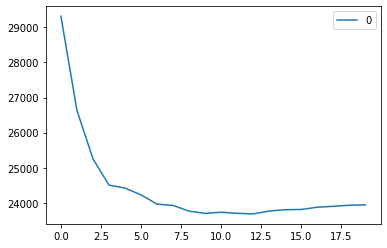

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
categories_knn = categories_knn_grid.best_estimator_

categories_knn.fit(X_train, y_train)

#cross validate
categories_knn_scores = cross_val_score(categories_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_knn_scores)))

Accuracy Scores for the 5 folds:  [0.54522813 0.47488432 0.46654871 0.47307815 0.46457745]
Mean Cross Validation Score: 0.484863351991733360080161219229922


In [ ]:
#generate predictions
categories_knn_preds = categories_knn.predict(X_test)

#more performance metrics
categories_knn_rsquared_train = categories_knn.score(X_train, y_train)
categories_knn_rsquared_test = categories_knn.score(X_test, y_test)
categories_knn_mae = mean_absolute_error(y_test, categories_knn_preds)
categories_knn_mse = mse(y_test, categories_knn_preds)
categories_knn_rmse = rmse(y_test, categories_knn_preds)
categories_knn_mape = np.mean(np.abs((y_test - categories_knn_preds)/y_test)*100)
categories_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_knn_preds) / y_test)))) * 100
categories_knn_model_name = 'Categories KNN'

#create easily readable display of performance metrics
categories_knn_dictionary = {'Model': categories_knn_model_name,
  'Training Set R Squared': categories_knn_rsquared_train, 
  'Test Set R Squared': categories_knn_rsquared_test, 'Mean Absolute Error': categories_knn_mae, 
  'Mean Sqaured Error': categories_knn_mse, 'Root Mean Squared Error': categories_knn_rmse,
  'Root Mean Squared Percentage Error': categories_knn_rmspe,
  'Mean Absolute Percentage Error': categories_knn_mape}

categories_knn_df = pd.DataFrame(categories_knn_dictionary, index=[0])

categories_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories KNN,0.977943,0.533593,16822.530302,5.665663e+08,23802.652825,25.766713,18.303869


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.5s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  30937.95266163579
RMSe Value for K=  2 is  27734.775009939556
RMSe Value for K=  3 is  26825.673109067833
RMSe Value for K=  4 is  25784.698778513746
RMSe Value for K=  5 is  25157.789850066303
RMSe Value for K=  6 is  25004.952450787474
RMSe Value for K=  7 is  24797.110427150434
RMSe Value for K=  8 is  24755.188943832374
RMSe Value for K=  9 is  24692.522288480537
RMSe Value for K=  10 is  24577.489338468702
RMSe Value for K=  11 is  24492.56287942315
RMSe Value for K=  12 is  24523.38229000008
RMSe Value for K=  13 is  24463.331577778416
RMSe Value for K=  14 is  24423.39301197661
RMSe Value for K=  15 is  24376.43106812038
RMSe Value for K=  16 is  24306.578901057157
RMSe Value for K=  17 is  24306.951866328964
RMSe Value for K=  18 is  24240.02731762952
RMSe Value for K=  19 is  24209.090661961054
RMSe Value for K=  20 is  24218.885687325972


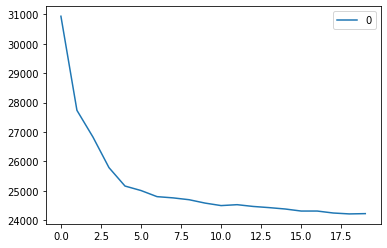

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
years_exp_knn = years_exp_knn_grid.best_estimator_

years_exp_knn.fit(X_train, y_train)

#cross validate
years_exp_knn_scores = cross_val_score(years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.48861811 0.50137513 0.50213189 0.46649042 0.50033745]
Mean Cross Validation Score: 0.491790598521411215227061575205880


In [ ]:
#generate predictions
years_exp_knn_preds = years_exp_knn.predict(X_test)

#more performance metrics
years_exp_knn_rsquared_train = years_exp_knn.score(X_train, y_train)
years_exp_knn_rsquared_test = years_exp_knn.score(X_test, y_test)
years_exp_knn_mae = mean_absolute_error(y_test, years_exp_knn_preds)
years_exp_knn_mse = mse(y_test, years_exp_knn_preds)
years_exp_knn_rmse = rmse(y_test, years_exp_knn_preds)
years_exp_knn_mape = np.mean(np.abs((y_test - years_exp_knn_preds)/y_test)*100)
years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - years_exp_knn_preds) / y_test)))) * 100
years_exp_knn_model_name = 'Years of Experience KNN'

#create easily readable display of performance metrics
years_exp_knn_dictionary = {'Model': years_exp_knn_model_name,
  'Training Set R Squared': years_exp_knn_rsquared_train, 
  'Test Set R Squared': years_exp_knn_rsquared_test, 'Mean Absolute Error': years_exp_knn_mae, 
  'Mean Sqaured Error': years_exp_knn_mse, 'Root Mean Squared Error': years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': years_exp_knn_mape}

years_exp_knn_df = pd.DataFrame(years_exp_knn_dictionary, index=[0])

years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience KNN,0.978523,0.503578,16974.645518,5.942104e+08,24376.431068,28.099777,19.401966


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_categories_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_categories_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.3s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.30388079572213483
RMSe Value for K=  2 is  0.2705037103453972
RMSe Value for K=  3 is  0.25934231633847477
RMSe Value for K=  4 is  0.25136349531650287
RMSe Value for K=  5 is  0.25014720139893104
RMSe Value for K=  6 is  0.24712226856487493
RMSe Value for K=  7 is  0.2444139341561265
RMSe Value for K=  8 is  0.2434669804421659
RMSe Value for K=  9 is  0.242025889433034
RMSe Value for K=  10 is  0.24107284939846776
RMSe Value for K=  11 is  0.24173330152375125
RMSe Value for K=  12 is  0.24142429999253126
RMSe Value for K=  13 is  0.24115650674956873
RMSe Value for K=  14 is  0.2419986158490582
RMSe Value for K=  15 is  0.24214723383059694
RMSe Value for K=  16 is  0.24199461874764736
RMSe Value for K=  17 is  0.24250514027415268
RMSe Value for K=  18 is  0.2426947774688815
RMSe Value for K=  19 is  0.24318306088793826
RMSe Value for K=  20 is  0.2432008004498014


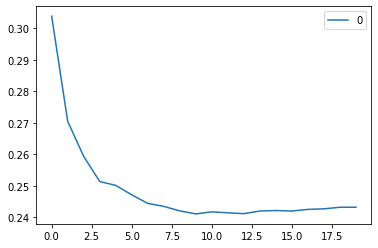

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_categories_knn = log_categories_knn_grid.best_estimator_

log_categories_knn.fit(X_train, y_train)

#cross validate
log_categories_knn_scores = cross_val_score(log_categories_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_knn_scores)))

Accuracy Scores for the 5 folds:  [0.54059199 0.50271556 0.50188783 0.51080935 0.48963551]
Mean Cross Validation Score: 0.509128047268163408389796131814364


In [ ]:
#generate predictions
log_categories_knn_preds = log_categories_knn.predict(X_test)

#more performance metrics
log_categories_knn_rsquared_train = log_categories_knn.score(X_train, y_train)
log_categories_knn_rsquared_test = log_categories_knn.score(X_test, y_test)
log_categories_knn_mae = mean_absolute_error(y_test, log_categories_knn_preds)
log_categories_knn_mse = mse(y_test, log_categories_knn_preds)
log_categories_knn_rmse = rmse(y_test, log_categories_knn_preds)
log_categories_knn_mape = np.mean(np.abs((y_test - log_categories_knn_preds)/y_test)*100)
log_categories_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_knn_preds) / y_test)))) * 100
log_categories_knn_model_name = 'Categories KNN Log(y)'

#create easily readable display of performance metrics
log_categories_knn_dictionary = {'Model': log_categories_knn_model_name,
  'Training Set R Squared': log_categories_knn_rsquared_train, 
  'Test Set R Squared': log_categories_knn_rsquared_test, 'Mean Absolute Error': log_categories_knn_mae, 
  'Mean Sqaured Error': log_categories_knn_mse, 'Root Mean Squared Error': log_categories_knn_rmse,
  'Root Mean Squared Percentage Error': log_categories_knn_rmspe,
  'Mean Absolute Percentage Error': log_categories_knn_mape}

log_categories_knn_df = pd.DataFrame(log_categories_knn_dictionary, index=[0])

log_categories_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories KNN Log(y),0.983326,0.544524,0.179539,0.058635,0.242147,2.119425,1.572387


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.5s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.3093014454390967
RMSe Value for K=  2 is  0.2773179407292047
RMSe Value for K=  3 is  0.2686480633594441
RMSe Value for K=  4 is  0.2590134240542687
RMSe Value for K=  5 is  0.25194359771637564
RMSe Value for K=  6 is  0.250693310015244
RMSe Value for K=  7 is  0.24858576297714285
RMSe Value for K=  8 is  0.2482589259577399
RMSe Value for K=  9 is  0.24735368814463307
RMSe Value for K=  10 is  0.24632869129535329
RMSe Value for K=  11 is  0.24598953223034045
RMSe Value for K=  12 is  0.245673519256343
RMSe Value for K=  13 is  0.24541335186095165
RMSe Value for K=  14 is  0.24527124752203944
RMSe Value for K=  15 is  0.24496286947695314
RMSe Value for K=  16 is  0.24462488307543623
RMSe Value for K=  17 is  0.24448231748057841
RMSe Value for K=  18 is  0.24377369597853288
RMSe Value for K=  19 is  0.24352767764133157
RMSe Value for K=  20 is  0.24352144212969146


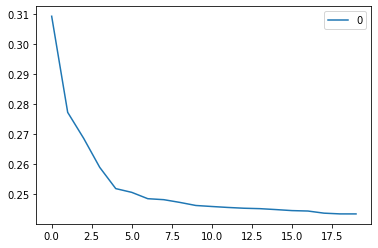

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_years_exp_knn = log_years_exp_knn_grid.best_estimator_

log_years_exp_knn.fit(X_train, y_train)

#cross validate
log_years_exp_knn_scores = cross_val_score(log_years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.51716862 0.52256182 0.52414213 0.50557845 0.52444583]
Mean Cross Validation Score: 0.518779370569639852739385332824895


In [ ]:
#generate predictions
log_years_exp_knn_preds = log_years_exp_knn.predict(X_test)

#more performance metrics
log_years_exp_knn_rsquared_train = log_years_exp_knn.score(X_train, y_train)
log_years_exp_knn_rsquared_test = log_years_exp_knn.score(X_test, y_test)
log_years_exp_knn_mae = mean_absolute_error(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mse = mse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_rmse = rmse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mape = np.mean(np.abs((y_test - log_years_exp_knn_preds)/y_test)*100)
log_years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_years_exp_knn_preds) / y_test)))) * 100
log_years_exp_knn_model_name = 'Years of Experience KNN Log(y)'

#create easily readable display of performance metrics
log_years_exp_knn_dictionary = {'Model': log_years_exp_knn_model_name,
  'Training Set R Squared': log_years_exp_knn_rsquared_train, 
  'Test Set R Squared': log_years_exp_knn_rsquared_test, 'Mean Absolute Error': log_years_exp_knn_mae, 
  'Mean Sqaured Error': log_years_exp_knn_mse, 'Root Mean Squared Error': log_years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': log_years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': log_years_exp_knn_mape}

log_years_exp_knn_df = pd.DataFrame(log_years_exp_knn_dictionary, index=[0])

log_years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience KNN Log(y),0.982898,0.540537,0.179638,0.060007,0.244963,2.15888,1.580723


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
cat_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
cat_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.1s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  27569.261562905125
RMSe Value for K=  2 is  24461.194288095878
RMSe Value for K=  3 is  23107.356763312328
RMSe Value for K=  4 is  22660.74376118986
RMSe Value for K=  5 is  22453.989197185416
RMSe Value for K=  6 is  22339.203816491292
RMSe Value for K=  7 is  22248.782424309666
RMSe Value for K=  8 is  22232.28374215338
RMSe Value for K=  9 is  22206.845950457562
RMSe Value for K=  10 is  22183.080184191174
RMSe Value for K=  11 is  22196.498032814678
RMSe Value for K=  12 is  22089.862992723327
RMSe Value for K=  13 is  22131.21321507652
RMSe Value for K=  14 is  22119.933871124707
RMSe Value for K=  15 is  22171.688410284132
RMSe Value for K=  16 is  22206.964860217653
RMSe Value for K=  17 is  22180.141461310286
RMSe Value for K=  18 is  22165.438356173214
RMSe Value for K=  19 is  22171.027106684065
RMSe Value for K=  20 is  22121.5013146914


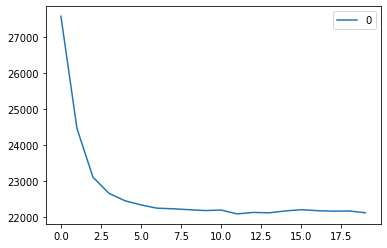

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_knn = cat_no_outliers_knn_grid.best_estimator_

cat_no_outliers_knn.fit(X_train, y_train)

#cross validate
cat_no_outliers_knn_scores = cross_val_score(cat_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.54668226 0.47760394 0.53774327 0.49424289 0.47362095]
Mean Cross Validation Score: 0.505978663476588153002921899314970


In [ ]:
#generate predictions
cat_no_outliers_knn_preds = cat_no_outliers_knn.predict(X_test)

#more performance metrics
cat_no_outliers_knn_rsquared_train = cat_no_outliers_knn.score(X_train, y_train)
cat_no_outliers_knn_rsquared_test = cat_no_outliers_knn.score(X_test, y_test)
cat_no_outliers_knn_mae = mean_absolute_error(y_test, cat_no_outliers_knn_preds)
cat_no_outliers_knn_mse = mse(y_test, cat_no_outliers_knn_preds)
cat_no_outliers_knn_rmse = rmse(y_test, cat_no_outliers_knn_preds)
cat_no_outliers_knn_mape = np.mean(np.abs((y_test - cat_no_outliers_knn_preds)/y_test)*100)
cat_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_knn_preds) / y_test)))) * 100
cat_no_outliers_knn_model_name = 'Categories w/o Outliers KNN'

#create easily readable display of performance metrics
cat_no_outliers_knn_dictionary = {'Model': cat_no_outliers_knn_model_name,
  'Training Set R Squared': cat_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_knn_rsquared_test, 'Mean Absolute Error': cat_no_outliers_knn_mae, 
  'Mean Sqaured Error': cat_no_outliers_knn_mse, 'Root Mean Squared Error': cat_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_knn_mape}

cat_no_outliers_knn_df = pd.DataFrame(cat_no_outliers_knn_dictionary, index=[0])

cat_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers KNN,0.985148,0.523199,16354.864443,4.915838e+08,22171.68841,26.564941,18.755134


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
years_exp_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
years_exp_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(years_exp_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(years_exp_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.3s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  28885.20298631841
RMSe Value for K=  2 is  25230.602640165238
RMSe Value for K=  3 is  23853.87064598843
RMSe Value for K=  4 is  23216.72241649365
RMSe Value for K=  5 is  22901.822174909372
RMSe Value for K=  6 is  22723.404085757582
RMSe Value for K=  7 is  22438.824929457565
RMSe Value for K=  8 is  22439.058056855403
RMSe Value for K=  9 is  22228.238943005814
RMSe Value for K=  10 is  22093.412990561766
RMSe Value for K=  11 is  22106.26501807345
RMSe Value for K=  12 is  22090.309161643854
RMSe Value for K=  13 is  22124.245974723966
RMSe Value for K=  14 is  22076.742821567565
RMSe Value for K=  15 is  22116.67332065157
RMSe Value for K=  16 is  22040.530338652225
RMSe Value for K=  17 is  22080.451587025756
RMSe Value for K=  18 is  22042.96299259739
RMSe Value for K=  19 is  22012.804791090002
RMSe Value for K=  20 is  21997.174496612002


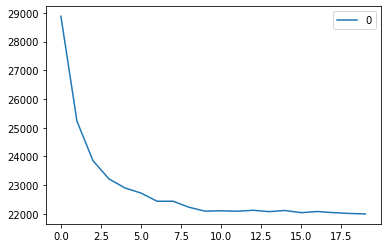

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
years_exp_no_outliers_knn = years_exp_no_outliers_knn_grid.best_estimator_

years_exp_no_outliers_knn.fit(X_train, y_train)

#cross validate
years_exp_no_outliers_knn_scores = cross_val_score(years_exp_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', years_exp_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(years_exp_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53051502 0.53560168 0.56595458 0.46175927 0.55019136]
Mean Cross Validation Score: 0.528804380537997165134811439202167


In [ ]:
#generate predictions
years_exp_no_outliers_knn_preds = years_exp_no_outliers_knn.predict(X_test)

#more performance metrics
years_exp_no_outliers_knn_rsquared_train = years_exp_no_outliers_knn.score(X_train, y_train)
years_exp_no_outliers_knn_rsquared_test = years_exp_no_outliers_knn.score(X_test, y_test)
years_exp_no_outliers_knn_mae = mean_absolute_error(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_mse = mse(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_rmse = rmse(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_mape = np.mean(np.abs((y_test - years_exp_no_outliers_knn_preds)/y_test)*100)
years_exp_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - years_exp_no_outliers_knn_preds) / y_test)))) * 100
years_exp_no_outliers_knn_model_name = 'Years of Experience w/o Outliers KNN'

#create easily readable display of performance metrics
years_exp_no_outliers_knn_dictionary = {'Model': years_exp_no_outliers_knn_model_name,
  'Training Set R Squared': years_exp_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': years_exp_no_outliers_knn_rsquared_test, 'Mean Absolute Error': years_exp_no_outliers_knn_mae, 
  'Mean Sqaured Error': years_exp_no_outliers_knn_mse, 'Root Mean Squared Error': years_exp_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': years_exp_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': years_exp_no_outliers_knn_mape}

years_exp_no_outliers_knn_df = pd.DataFrame(years_exp_no_outliers_knn_dictionary, index=[0])

years_exp_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers KNN,0.985112,0.486631,15898.365136,4.891472e+08,22116.673321,25.145015,17.773036


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_cat_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_cat_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.4s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.30534326769824566
RMSe Value for K=  2 is  0.26747015857531875
RMSe Value for K=  3 is  0.2513476133559291
RMSe Value for K=  4 is  0.24570198507642013
RMSe Value for K=  5 is  0.2433796013393878
RMSe Value for K=  6 is  0.24166225429150656
RMSe Value for K=  7 is  0.24075831292815483
RMSe Value for K=  8 is  0.24047979260858546
RMSe Value for K=  9 is  0.23986932441921527
RMSe Value for K=  10 is  0.23948694037912102
RMSe Value for K=  11 is  0.2395048843469539
RMSe Value for K=  12 is  0.23890123658945106
RMSe Value for K=  13 is  0.2393033407670956
RMSe Value for K=  14 is  0.2390597232697915
RMSe Value for K=  15 is  0.23950943249900344
RMSe Value for K=  16 is  0.2399857198089177
RMSe Value for K=  17 is  0.23987851085627496
RMSe Value for K=  18 is  0.23962692059141402
RMSe Value for K=  19 is  0.23952281438169076
RMSe Value for K=  20 is  0.23896100046688334


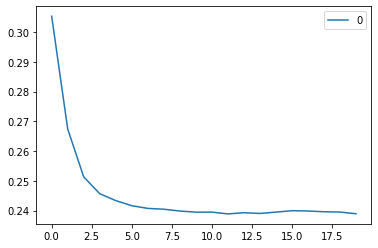

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_knn = log_cat_no_outliers_knn_grid.best_estimator_

log_cat_no_outliers_knn.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_knn_scores = cross_val_score(log_cat_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.54927783 0.47782989 0.53870858 0.50797221 0.4947759 ]
Mean Cross Validation Score: 0.513712882993474839743441862083273


In [ ]:
#generate predictions
log_cat_no_outliers_knn_preds = log_cat_no_outliers_knn.predict(X_test)

#more performance metrics
log_cat_no_outliers_knn_rsquared_train = log_cat_no_outliers_knn.score(X_train, y_train)
log_cat_no_outliers_knn_rsquared_test = log_cat_no_outliers_knn.score(X_test, y_test)
log_cat_no_outliers_knn_mae = mean_absolute_error(y_test, log_cat_no_outliers_knn_preds)
log_cat_no_outliers_knn_mse = mse(y_test, log_cat_no_outliers_knn_preds)
log_cat_no_outliers_knn_rmse = rmse(y_test, log_cat_no_outliers_knn_preds)
log_cat_no_outliers_knn_mape = np.mean(np.abs((y_test - log_cat_no_outliers_knn_preds)/y_test)*100)
log_cat_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_knn_preds) / y_test)))) * 100
log_cat_no_outliers_knn_model_name = 'Categories w/o Outliers KNN Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_knn_dictionary = {'Model': log_cat_no_outliers_knn_model_name,
  'Training Set R Squared': log_cat_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_knn_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_knn_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_knn_mse, 'Root Mean Squared Error': log_cat_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_knn_mape}

log_cat_no_outliers_knn_df = pd.DataFrame(log_cat_no_outliers_knn_dictionary, index=[0])

log_cat_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers KNN Log(y),0.986566,0.515524,0.179869,0.057365,0.239509,2.111973,1.581618


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_years_exp_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_years_exp_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_years_exp_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_years_exp_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.3s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.3081856948124604
RMSe Value for K=  2 is  0.2664576199561255
RMSe Value for K=  3 is  0.2516058894889153
RMSe Value for K=  4 is  0.24446545737383735
RMSe Value for K=  5 is  0.24108903358373554
RMSe Value for K=  6 is  0.23860339421849075
RMSe Value for K=  7 is  0.23573357707254003
RMSe Value for K=  8 is  0.23542076215939334
RMSe Value for K=  9 is  0.23277933194365447
RMSe Value for K=  10 is  0.2315887816702676
RMSe Value for K=  11 is  0.2316311893348695
RMSe Value for K=  12 is  0.23144802993844013
RMSe Value for K=  13 is  0.23211587029407432
RMSe Value for K=  14 is  0.23212113211245422
RMSe Value for K=  15 is  0.23225714568737724
RMSe Value for K=  16 is  0.23132363047000404
RMSe Value for K=  17 is  0.23159534709564059
RMSe Value for K=  18 is  0.23142173935189725
RMSe Value for K=  19 is  0.23108237531922196
RMSe Value for K=  20 is  0.2311535538336075


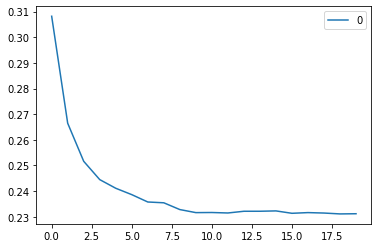

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_years_exp_no_outliers_knn = log_years_exp_no_outliers_knn_grid.best_estimator_

log_years_exp_no_outliers_knn.fit(X_train, y_train)

#cross validate
log_years_exp_no_outliers_knn_scores = cross_val_score(log_years_exp_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_years_exp_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_years_exp_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.55329555 0.54169125 0.5583451  0.45227548 0.54512341]
Mean Cross Validation Score: 0.530146158292698621572469619422918


In [ ]:
#generate predictions
log_years_exp_no_outliers_knn_preds = log_years_exp_no_outliers_knn.predict(X_test)

#more performance metrics
log_years_exp_no_outliers_knn_rsquared_train = log_years_exp_no_outliers_knn.score(X_train, y_train)
log_years_exp_no_outliers_knn_rsquared_test = log_years_exp_no_outliers_knn.score(X_test, y_test)
log_years_exp_no_outliers_knn_mae = mean_absolute_error(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_mse = mse(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_rmse = rmse(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_mape = np.mean(np.abs((y_test - log_years_exp_no_outliers_knn_preds)/y_test)*100)
log_years_exp_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_years_exp_no_outliers_knn_preds) / y_test)))) * 100
log_years_exp_no_outliers_knn_model_name = 'Years of Experience w/o Outliers KNN Log(y)'

#create easily readable display of performance metrics
log_years_exp_no_outliers_knn_dictionary = {'Model': log_years_exp_no_outliers_knn_model_name,
  'Training Set R Squared': log_years_exp_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': log_years_exp_no_outliers_knn_rsquared_test, 'Mean Absolute Error': log_years_exp_no_outliers_knn_mae, 
  'Mean Sqaured Error': log_years_exp_no_outliers_knn_mse, 'Root Mean Squared Error': log_years_exp_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': log_years_exp_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': log_years_exp_no_outliers_knn_mape}

log_years_exp_no_outliers_knn_df = pd.DataFrame(log_years_exp_no_outliers_knn_dictionary, index=[0])

log_years_exp_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers KNN Log(y),0.986039,0.509919,0.170876,0.053943,0.232257,2.037645,1.499177


## **Random Forest**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [43]}  
  
# categories_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# categories_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(categories_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(categories_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
categories_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

categories_rf.fit(X_train, y_train)

#cross validate
categories_rf_scores = cross_val_score(categories_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_rf_scores)))

Accuracy Scores for the 5 folds:  [0.59101061 0.55864704 0.53172513 0.53614832 0.53279307]
Mean Cross Validation Score: 0.550064833577618039761603085935349


In [ ]:
#generate predictions
categories_rf_preds = categories_rf.predict(X_test)

#more performance metrics
categories_rf_rsquared_train = categories_rf.score(X_train, y_train)
categories_rf_rsquared_test = categories_rf.score(X_test, y_test)
categories_rf_mae = mean_absolute_error(y_test, categories_rf_preds)
categories_rf_mse = mse(y_test, categories_rf_preds)
categories_rf_rmse = rmse(y_test, categories_rf_preds)
categories_rf_mape = np.mean(np.abs((y_test - categories_rf_preds)/y_test)*100)
categories_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_rf_preds) / y_test)))) * 100
categories_rf_model_name = 'Categories Random Forest'

#create easily readable display of performance metrics
categories_rf_dictionary = {'Model': categories_rf_model_name,
  'Training Set R Squared': categories_rf_rsquared_train, 
  'Test Set R Squared': categories_rf_rsquared_test, 'Mean Absolute Error': categories_rf_mae, 
  'Mean Sqaured Error': categories_rf_mse, 'Root Mean Squared Error': categories_rf_rmse,
  'Root Mean Squared Percentage Error': categories_rf_rmspe,
  'Mean Absolute Percentage Error': categories_rf_mape}

categories_rf_df = pd.DataFrame(categories_rf_dictionary, index=[0])

categories_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Random Forest,0.975766,0.600387,15367.506564,4.854282e+08,22032.436267,24.454074,16.955073


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# yrs_exp_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# yrs_exp_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(yrs_exp_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(yrs_exp_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
yrs_exp_rf.fit(X_train, y_train)

#cross validate
yrs_exp_rf_scores = cross_val_score(yrs_exp_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_rf_scores)))

Accuracy Scores for the 5 folds:  [0.56326352 0.55535181 0.54953527 0.52099859 0.5469704 ]
Mean Cross Validation Score: 0.547223918568492395664293326262850


In [ ]:
#generate predictions
yrs_exp_rf_preds = yrs_exp_rf.predict(X_test)

#more performance metrics
yrs_exp_rf_rsquared_train = yrs_exp_rf.score(X_train, y_train)
yrs_exp_rf_rsquared_test = yrs_exp_rf.score(X_test, y_test)
yrs_exp_rf_mae = mean_absolute_error(y_test, yrs_exp_rf_preds)
yrs_exp_rf_mse = mse(y_test, yrs_exp_rf_preds)
yrs_exp_rf_rmse = rmse(y_test, yrs_exp_rf_preds)
yrs_exp_rf_mape = np.mean(np.abs((y_test - yrs_exp_rf_preds)/y_test)*100)
yrs_exp_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_rf_preds) / y_test)))) * 100
yrs_exp_rf_model_name = 'Years of Experience Random Forest'

#create easily readable display of performance metrics
yrs_exp_rf_dictionary = {'Model': yrs_exp_rf_model_name,
  'Training Set R Squared': yrs_exp_rf_rsquared_train, 
  'Test Set R Squared': yrs_exp_rf_rsquared_test, 'Mean Absolute Error': yrs_exp_rf_mae, 
  'Mean Sqaured Error': yrs_exp_rf_mse, 'Root Mean Squared Error': yrs_exp_rf_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_rf_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_rf_mape}

yrs_exp_rf_df = pd.DataFrame(yrs_exp_rf_dictionary, index=[0])

yrs_exp_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Random Forest,0.976494,0.563798,15528.813267,5.221279e+08,22850.119105,26.742774,17.923973


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_categories_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_categories_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_categories_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_categories_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_categories_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_categories_rf.fit(X_train, y_train)

#cross validate
log_categories_rf_scores = cross_val_score(log_categories_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_rf_scores)))

Accuracy Scores for the 5 folds:  [0.59808189 0.59889316 0.58398849 0.59035832 0.58068849]
Mean Cross Validation Score: 0.590402070493077357760114409757080


In [ ]:
#generate predictions
log_categories_rf_preds = log_categories_rf.predict(X_test)

#more performance metrics
log_categories_rf_rsquared_train = log_categories_rf.score(X_train, y_train)
log_categories_rf_rsquared_test = log_categories_rf.score(X_test, y_test)
log_categories_rf_mae = mean_absolute_error(y_test, log_categories_rf_preds)
log_categories_rf_mse = mse(y_test, log_categories_rf_preds)
log_categories_rf_rmse = rmse(y_test, log_categories_rf_preds)
log_categories_rf_mape = np.mean(np.abs((y_test - log_categories_rf_preds)/y_test)*100)
log_categories_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_rf_preds) / y_test)))) * 100
log_categories_rf_model_name = 'Categories Random Forest Log(y)'

#create easily readable display of performance metrics
log_categories_rf_dictionary = {'Model': log_categories_rf_model_name,
  'Training Set R Squared': log_categories_rf_rsquared_train, 
  'Test Set R Squared': log_categories_rf_rsquared_test, 'Mean Absolute Error': log_categories_rf_mae, 
  'Mean Sqaured Error': log_categories_rf_mse, 'Root Mean Squared Error': log_categories_rf_rmse,
  'Root Mean Squared Percentage Error': log_categories_rf_rmspe,
  'Mean Absolute Percentage Error': log_categories_rf_mape}

log_categories_rf_df = pd.DataFrame(log_categories_rf_dictionary, index=[0])

log_categories_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Random Forest Log(y),0.910878,0.627317,0.162308,0.047977,0.219036,1.923583,1.424258


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_yrs_exp_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_yrs_exp_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_yrs_exp_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_yrs_exp_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
log_yrs_exp_rf.fit(X_train, y_train)

#cross validate
log_yrs_exp_rf_scores = cross_val_score(log_yrs_exp_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_rf_scores)))

Accuracy Scores for the 5 folds:  [0.58116732 0.58564282 0.57043867 0.56234231 0.57538141]
Mean Cross Validation Score: 0.574994506864646148791564428393031


In [ ]:
#generate predictions
log_yrs_exp_rf_preds = log_yrs_exp_rf.predict(X_test)

#more performance metrics
log_yrs_exp_rf_rsquared_train = log_yrs_exp_rf.score(X_train, y_train)
log_yrs_exp_rf_rsquared_test = log_yrs_exp_rf.score(X_test, y_test)
log_yrs_exp_rf_mae = mean_absolute_error(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_mse = mse(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_rmse = rmse(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_mape = np.mean(np.abs((y_test - log_yrs_exp_rf_preds)/y_test)*100)
log_yrs_exp_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_rf_preds) / y_test)))) * 100
log_yrs_exp_rf_model_name = 'Years of Experience Random Forest Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_rf_dictionary = {'Model': log_yrs_exp_rf_model_name,
  'Training Set R Squared': log_yrs_exp_rf_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_rf_rsquared_test, 'Mean Absolute Error': log_yrs_exp_rf_mae, 
  'Mean Sqaured Error': log_yrs_exp_rf_mse, 'Root Mean Squared Error': log_yrs_exp_rf_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_rf_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_rf_mape}

log_yrs_exp_rf_df = pd.DataFrame(log_yrs_exp_rf_dictionary, index=[0])

log_yrs_exp_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Random Forest Log(y),0.982898,0.59653,0.164299,0.052694,0.229552,2.025203,1.447082


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [43]}  
  
# cat_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# cat_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(cat_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(cat_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

cat_no_outliers_rf.fit(X_train, y_train)

#cross validate
cat_no_outliers_rf_scores = cross_val_score(cat_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.61527494 0.56027747 0.61861105 0.57585689 0.56824822]
Mean Cross Validation Score: 0.587653713761681628646726949227741


In [ ]:
#generate predictions
cat_no_outliers_rf_preds = cat_no_outliers_rf.predict(X_test)

#more performance metrics
cat_no_outliers_rf_rsquared_train = cat_no_outliers_rf.score(X_train, y_train)
cat_no_outliers_rf_rsquared_test = cat_no_outliers_rf.score(X_test, y_test)
cat_no_outliers_rf_mae = mean_absolute_error(y_test, cat_no_outliers_rf_preds)
cat_no_outliers_rf_mse = mse(y_test, cat_no_outliers_rf_preds)
cat_no_outliers_rf_rmse = rmse(y_test, cat_no_outliers_rf_preds)
cat_no_outliers_rf_mape = np.mean(np.abs((y_test - cat_no_outliers_rf_preds)/y_test)*100)
cat_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_rf_preds) / y_test)))) * 100
cat_no_outliers_rf_model_name = 'Categories w/o Outliers Random Forest'

#create easily readable display of performance metrics
cat_no_outliers_rf_dictionary = {'Model': cat_no_outliers_rf_model_name,
  'Training Set R Squared': cat_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_rf_rsquared_test, 'Mean Absolute Error': cat_no_outliers_rf_mae, 
  'Mean Sqaured Error': cat_no_outliers_rf_mse, 'Root Mean Squared Error': cat_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_rf_mape}

cat_no_outliers_rf_df = pd.DataFrame(cat_no_outliers_rf_dictionary, index=[0])

cat_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Random Forest,0.944975,0.617602,14767.855231,3.942534e+08,19855.816434,24.318608,17.173618


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# yrs_exp_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# yrs_exp_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(yrs_exp_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(yrs_exp_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
yrs_exp_no_outliers_rf.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_rf_scores = cross_val_score(yrs_exp_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.60428856 0.6173108  0.6162906  0.53740843 0.61364344]
Mean Cross Validation Score: 0.597788364618446088627479184651747


In [ ]:
#generate predictions
yrs_exp_no_outliers_rf_preds = yrs_exp_no_outliers_rf.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_rf_rsquared_train = yrs_exp_no_outliers_rf.score(X_train, y_train)
yrs_exp_no_outliers_rf_rsquared_test = yrs_exp_no_outliers_rf.score(X_test, y_test)
yrs_exp_no_outliers_rf_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_rf_preds)
yrs_exp_no_outliers_rf_mse = mse(y_test, yrs_exp_no_outliers_rf_preds)
yrs_exp_no_outliers_rf_rmse = rmse(y_test, yrs_exp_no_outliers_rf_preds)
yrs_exp_no_outliers_rf_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_rf_preds)/y_test)*100)
yrs_exp_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_rf_preds) / y_test)))) * 100
yrs_exp_no_outliers_rf_model_name = 'Years of Experience w/o Outliers Random Forest'

#create easily readable display of performance metrics
yrs_exp_no_outliers_rf_dictionary = {'Model': yrs_exp_no_outliers_rf_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_rf_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_rf_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_rf_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_rf_mape}

yrs_exp_no_outliers_rf_df = pd.DataFrame(yrs_exp_no_outliers_rf_dictionary, index=[0])

yrs_exp_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Random Forest,0.944127,0.586782,14437.372001,3.937217e+08,19842.421851,23.810016,16.476445


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_cat_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_cat_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_cat_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_cat_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_cat_no_outliers_rf.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_rf_scores = cross_val_score(log_cat_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.61805971 0.56241378 0.62166109 0.5829554  0.57846804]
Mean Cross Validation Score: 0.592711603275977716442923792783404


In [ ]:
#generate predictions
log_cat_no_outliers_rf_preds = log_cat_no_outliers_rf.predict(X_test)

#more performance metrics
log_cat_no_outliers_rf_rsquared_train = log_cat_no_outliers_rf.score(X_train, y_train)
log_cat_no_outliers_rf_rsquared_test = log_cat_no_outliers_rf.score(X_test, y_test)
log_cat_no_outliers_rf_mae = mean_absolute_error(y_test, log_cat_no_outliers_rf_preds)
log_cat_no_outliers_rf_mse = mse(y_test, log_cat_no_outliers_rf_preds)
log_cat_no_outliers_rf_rmse = rmse(y_test, log_cat_no_outliers_rf_preds)
log_cat_no_outliers_rf_mape = np.mean(np.abs((y_test - log_cat_no_outliers_rf_preds)/y_test)*100)
log_cat_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_rf_preds) / y_test)))) * 100
log_cat_no_outliers_rf_model_name = 'Categories w/o Outliers Random Forest Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_rf_dictionary = {'Model': log_cat_no_outliers_rf_model_name,
  'Training Set R Squared': log_cat_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_rf_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_rf_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_rf_mse, 'Root Mean Squared Error': log_cat_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_rf_mape}

log_cat_no_outliers_rf_df = pd.DataFrame(log_cat_no_outliers_rf_dictionary, index=[0])

log_cat_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Random Forest Log(y),0.911795,0.610747,0.162665,0.04609,0.214685,1.896699,1.432243


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_yrs_exp_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_yrs_exp_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_yrs_exp_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_yrs_exp_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
log_yrs_exp_no_outliers_rf.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_rf_scores = cross_val_score(log_yrs_exp_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.61227019 0.62600853 0.6108376  0.53659466 0.61247421]
Mean Cross Validation Score: 0.599637038968862889909416935552144


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_rf_preds = log_yrs_exp_no_outliers_rf.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_rf_rsquared_train = log_yrs_exp_no_outliers_rf.score(X_train, y_train)
log_yrs_exp_no_outliers_rf_rsquared_test = log_yrs_exp_no_outliers_rf.score(X_test, y_test)
log_yrs_exp_no_outliers_rf_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_rf_preds)
log_yrs_exp_no_outliers_rf_mse = mse(y_test, log_yrs_exp_no_outliers_rf_preds)
log_yrs_exp_no_outliers_rf_rmse = rmse(y_test, log_yrs_exp_no_outliers_rf_preds)
log_yrs_exp_no_outliers_rf_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_rf_preds)/y_test)*100)
log_yrs_exp_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_rf_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_rf_model_name = 'Years of Experience w/o Outliers Random Forest Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_rf_dictionary = {'Model': log_yrs_exp_no_outliers_rf_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_rf_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_rf_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_rf_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_rf_mape}

log_yrs_exp_no_outliers_rf_df = pd.DataFrame(log_yrs_exp_no_outliers_rf_dictionary, index=[0])

log_yrs_exp_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Random Forest...,0.904975,0.602326,0.157093,0.043772,0.209218,1.845988,1.381207


## **Support Vector Machine**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
categories_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
categories_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
categories_svm = categories_svm_grid.best_estimator_

categories_svm.fit(X_train, y_train)

#cross validate
categories_svm_scores = cross_val_score(categories_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_svm_scores)))

Accuracy Scores for the 5 folds:  [ 0.00410202 -0.01421361  0.0094185  -0.02941012 -0.01103282]
Mean Cross Validation Score: -0.008227204881794847324272268451750


In [ ]:
#generate predictions
categories_svm_preds = categories_svm.predict(X_test)

#more performance metrics
categories_svm_rsquared_train = categories_svm.score(X_train, y_train)
categories_svm_rsquared_test = categories_svm.score(X_test, y_test)
categories_svm_mae = mean_absolute_error(y_test, categories_svm_preds)
categories_svm_mse = mse(y_test, categories_svm_preds)
categories_svm_rmse = rmse(y_test, categories_svm_preds)
categories_svm_mape = np.mean(np.abs((y_test - categories_svm_preds)/y_test)*100)
categories_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_svm_preds) / y_test)))) * 100
categories_svm_model_name = 'Categories SVM'

#create easily readable display of performance metrics
categories_svm_dictionary = {'Model': categories_svm_model_name,
  'Training Set R Squared': categories_svm_rsquared_train, 
  'Test Set R Squared': categories_svm_rsquared_test, 'Mean Absolute Error': categories_svm_mae, 
  'Mean Sqaured Error': categories_svm_mse, 'Root Mean Squared Error': categories_svm_rmse,
  'Root Mean Squared Percentage Error': categories_svm_rmspe,
  'Mean Absolute Percentage Error': categories_svm_mape}

categories_svm_df = pd.DataFrame(categories_svm_dictionary, index=[0])

categories_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories SVM,-0.001405,-0.012302,27366.191869,1.229689e+09,35066.915675,37.668476,29.70274


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
yrs_exp_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
yrs_exp_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_svm_grid.best_estimator_)  

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_svm = yrs_exp_svm_grid.best_estimator_

yrs_exp_svm.fit(X_train, y_train)

#cross validate
yrs_exp_svm_scores = cross_val_score(yrs_exp_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.02807345  0.00095264  0.01374131 -0.02376575 -0.00369812]
Mean Cross Validation Score: -0.008168674852056500776398273444556


In [ ]:
#generate predictions
yrs_exp_svm_preds = yrs_exp_svm.predict(X_test)

#more performance metrics
yrs_exp_svm_rsquared_train = yrs_exp_svm.score(X_train, y_train)
yrs_exp_svm_rsquared_test = yrs_exp_svm.score(X_test, y_test)
yrs_exp_svm_mae = mean_absolute_error(y_test, yrs_exp_svm_preds)
yrs_exp_svm_mse = mse(y_test, yrs_exp_svm_preds)
yrs_exp_svm_rmse = rmse(y_test, yrs_exp_svm_preds)
yrs_exp_svm_mape = np.mean(np.abs((y_test - yrs_exp_svm_preds)/y_test)*100)
yrs_exp_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_svm_preds) / y_test)))) * 100
yrs_exp_svm_model_name = 'Years of Experience SVM'

#create easily readable display of performance metrics
yrs_exp_svm_dictionary = {'Model': yrs_exp_svm_model_name,
  'Training Set R Squared': yrs_exp_svm_rsquared_train, 
  'Test Set R Squared': yrs_exp_svm_rsquared_test, 'Mean Absolute Error': yrs_exp_svm_mae, 
  'Mean Sqaured Error': yrs_exp_svm_mse, 'Root Mean Squared Error': yrs_exp_svm_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_svm_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_svm_mape}

yrs_exp_svm_df = pd.DataFrame(yrs_exp_svm_dictionary, index=[0])

yrs_exp_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience SVM,-0.002256,0.006884,26856.201708,1.188746e+09,34478.202152,39.247782,30.510856


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_categories_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_categories_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_svm_grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_svm = log_categories_svm_grid.best_estimator_


log_categories_svm.fit(X_train, y_train)

#cross validate
log_categories_svm_scores = cross_val_score(log_categories_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_svm_scores)))

Accuracy Scores for the 5 folds:  [0.53506103 0.53949392 0.51016296 0.5397658  0.53353468]
Mean Cross Validation Score: 0.531603679228343839469062004354782


In [ ]:
#generate predictions
log_categories_svm_preds = log_categories_svm.predict(X_test)

#more performance metrics
log_categories_svm_rsquared_train = log_categories_svm.score(X_train, y_train)
log_categories_svm_rsquared_test = log_categories_svm.score(X_test, y_test)
log_categories_svm_mae = mean_absolute_error(y_test, log_categories_svm_preds)
log_categories_svm_mse = mse(y_test, log_categories_svm_preds)
log_categories_svm_rmse = rmse(y_test, log_categories_svm_preds)
log_categories_svm_mape = np.mean(np.abs((y_test - log_categories_svm_preds)/y_test)*100)
log_categories_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_svm_preds) / y_test)))) * 100
log_categories_svm_model_name = 'Categories SVM Log(y)'

#create easily readable display of performance metrics
log_categories_svm_dictionary = {'Model': log_categories_svm_model_name,
  'Training Set R Squared': log_categories_svm_rsquared_train, 
  'Test Set R Squared': log_categories_svm_rsquared_test, 'Mean Absolute Error': log_categories_svm_mae, 
  'Mean Sqaured Error': log_categories_svm_mse, 'Root Mean Squared Error': log_categories_svm_rmse,
  'Root Mean Squared Percentage Error': log_categories_svm_rmspe,
  'Mean Absolute Percentage Error': log_categories_svm_mape}

log_categories_svm_df = pd.DataFrame(log_categories_svm_dictionary, index=[0])

log_categories_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories SVM Log(y),0.580485,0.574954,0.179829,0.054718,0.233919,2.061605,1.579479


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_yrs_exp_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_yrs_exp_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_svm_grid.best_estimator_)  

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_svm = log_yrs_exp_svm_grid.best_estimator_

log_yrs_exp_svm.fit(X_train, y_train)

#cross validate
log_yrs_exp_svm_scores = cross_val_score(log_yrs_exp_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_svm_scores)))

Accuracy Scores for the 5 folds:  [0.52982877 0.53625518 0.55921781 0.52243878 0.55099   ]
Mean Cross Validation Score: 0.539746107207133229977102928387467


In [ ]:
#generate predictions
log_yrs_exp_svm_preds = log_yrs_exp_svm.predict(X_test)

#more performance metrics
log_yrs_exp_svm_rsquared_train = log_yrs_exp_svm.score(X_train, y_train)
log_yrs_exp_svm_rsquared_test = log_yrs_exp_svm.score(X_test, y_test)
log_yrs_exp_svm_mae = mean_absolute_error(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_mse = mse(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_rmse = rmse(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_mape = np.mean(np.abs((y_test - log_yrs_exp_svm_preds)/y_test)*100)
log_yrs_exp_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_svm_preds) / y_test)))) * 100
log_yrs_exp_svm_model_name = 'Years of Experience SVM Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_svm_dictionary = {'Model': log_yrs_exp_svm_model_name,
  'Training Set R Squared': log_yrs_exp_svm_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_svm_rsquared_test, 'Mean Absolute Error': log_yrs_exp_svm_mae, 
  'Mean Sqaured Error': log_yrs_exp_svm_mse, 'Root Mean Squared Error': log_yrs_exp_svm_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_svm_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_svm_mape}

log_yrs_exp_svm_df = pd.DataFrame(log_yrs_exp_svm_dictionary, index=[0])

log_yrs_exp_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience SVM Log(y),0.591758,0.581838,0.177128,0.054613,0.233694,2.065633,1.560814


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
cat_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
cat_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_svm = cat_no_outliers_svm_grid.best_estimator_

cat_no_outliers_svm.fit(X_train, y_train)

#cross validate
cat_no_outliers_svm_scores = cross_val_score(cat_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.00247775 -0.0326317   0.0097676   0.00815561  0.00307685]
Mean Cross Validation Score: -0.002821878126106369590736511199225


In [ ]:
#generate predictions
cat_no_outliers_svm_preds = cat_no_outliers_svm.predict(X_test)

#more performance metrics
cat_no_outliers_svm_rsquared_train = cat_no_outliers_svm.score(X_train, y_train)
cat_no_outliers_svm_rsquared_test = cat_no_outliers_svm.score(X_test, y_test)
cat_no_outliers_svm_mae = mean_absolute_error(y_test, cat_no_outliers_svm_preds)
cat_no_outliers_svm_mse = mse(y_test, cat_no_outliers_svm_preds)
cat_no_outliers_svm_rmse = rmse(y_test, cat_no_outliers_svm_preds)
cat_no_outliers_svm_mape = np.mean(np.abs((y_test - cat_no_outliers_svm_preds)/y_test)*100)
cat_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_svm_preds) / y_test)))) * 100
cat_no_outliers_svm_model_name = 'Categories w/o Outliers SVM'

#create easily readable display of performance metrics
cat_no_outliers_svm_dictionary = {'Model': cat_no_outliers_svm_model_name,
  'Training Set R Squared': cat_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_svm_rsquared_test, 'Mean Absolute Error': cat_no_outliers_svm_mae, 
  'Mean Sqaured Error': cat_no_outliers_svm_mse, 'Root Mean Squared Error': cat_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_svm_mape}

cat_no_outliers_svm_df = pd.DataFrame(cat_no_outliers_svm_dictionary, index=[0])

cat_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers SVM,0.005037,0.0043,25862.78921,1.026570e+09,32040.133921,36.661546,29.194231


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
yrs_exp_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
yrs_exp_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_svm_grid.best_estimator_)  

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_svm = yrs_exp_no_outliers_svm_grid.best_estimator_

yrs_exp_no_outliers_svm.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_svm_scores = cross_val_score(yrs_exp_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.03716124 -0.02224782  0.01701964 -0.00661814  0.01733006]
Mean Cross Validation Score: -0.006335501724768310798097115110750


In [ ]:
#generate predictions
yrs_exp_no_outliers_svm_preds = yrs_exp_no_outliers_svm.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_svm_rsquared_train = yrs_exp_no_outliers_svm.score(X_train, y_train)
yrs_exp_no_outliers_svm_rsquared_test = yrs_exp_no_outliers_svm.score(X_test, y_test)
yrs_exp_no_outliers_svm_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_svm_preds)
yrs_exp_no_outliers_svm_mse = mse(y_test, yrs_exp_no_outliers_svm_preds)
yrs_exp_no_outliers_svm_rmse = rmse(y_test, yrs_exp_no_outliers_svm_preds)
yrs_exp_no_outliers_svm_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_svm_preds)/y_test)*100)
yrs_exp_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_svm_preds) / y_test)))) * 100
yrs_exp_no_outliers_svm_model_name = 'Years of Experience w/o Outliers SVM'

#create easily readable display of performance metrics
yrs_exp_no_outliers_svm_dictionary = {'Model': yrs_exp_no_outliers_svm_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_svm_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_svm_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_svm_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_svm_mape}

yrs_exp_no_outliers_svm_df = pd.DataFrame(yrs_exp_no_outliers_svm_dictionary, index=[0])

yrs_exp_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers SVM,0.002433,-0.018597,24904.949246,9.705372e+08,31153.446497,34.902355,27.592085


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_cat_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_cat_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_svm_grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_svm = log_cat_no_outliers_svm_grid.best_estimator_

log_cat_no_outliers_svm.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_svm_scores = cross_val_score(log_cat_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [0.54489445 0.50320894 0.57458886 0.51412254 0.53775435]
Mean Cross Validation Score: 0.534913828740095853575553519476671


In [ ]:
#generate predictions
log_cat_no_outliers_svm_preds = log_cat_no_outliers_svm.predict(X_test)

#more performance metrics
log_cat_no_outliers_svm_rsquared_train = log_cat_no_outliers_svm.score(X_train, y_train)
log_cat_no_outliers_svm_rsquared_test = log_cat_no_outliers_svm.score(X_test, y_test)
log_cat_no_outliers_svm_mae = mean_absolute_error(y_test, log_cat_no_outliers_svm_preds)
log_cat_no_outliers_svm_mse = mse(y_test, log_cat_no_outliers_svm_preds)
log_cat_no_outliers_svm_rmse = rmse(y_test, log_cat_no_outliers_svm_preds)
log_cat_no_outliers_svm_mape = np.mean(np.abs((y_test - log_cat_no_outliers_svm_preds)/y_test)*100)
log_cat_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_svm_preds) / y_test)))) * 100
log_cat_no_outliers_svm_model_name = 'Categories w/o OUtliers SVM Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_svm_dictionary = {'Model': log_cat_no_outliers_svm_model_name,
  'Training Set R Squared': log_cat_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_svm_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_svm_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_svm_mse, 'Root Mean Squared Error': log_cat_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_svm_mape}

log_cat_no_outliers_svm_df = pd.DataFrame(log_cat_no_outliers_svm_dictionary, index=[0])

log_cat_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o OUtliers SVM Log(y),0.585692,0.537148,0.182023,0.054804,0.234103,2.068048,1.601874


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_yrs_exp_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_yrs_exp_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_svm_grid.best_estimator_)  

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_svm = log_yrs_exp_no_outliers_svm_grid.best_estimator_

log_yrs_exp_no_outliers_svm.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_svm_scores = cross_val_score(log_yrs_exp_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_svm_scores)))

In [ ]:
#generate predictions
log_yrs_exp_no_outliers_svm_preds = log_yrs_exp_no_outliers_svm.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_svm_rsquared_train = log_yrs_exp_no_outliers_svm.score(X_train, y_train)
log_yrs_exp_no_outliers_svm_rsquared_test = log_yrs_exp_no_outliers_svm.score(X_test, y_test)
log_yrs_exp_no_outliers_svm_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_svm_preds)
log_yrs_exp_no_outliers_svm_mse = mse(y_test, log_yrs_exp_no_outliers_svm_preds)
log_yrs_exp_no_outliers_svm_rmse = rmse(y_test, log_yrs_exp_no_outliers_svm_preds)
log_yrs_exp_no_outliers_svm_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_svm_preds)/y_test)*100)
log_yrs_exp_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_svm_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_svm_model_name = 'Years of Experience w/o Outliers SVM Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_svm_dictionary = {'Model': log_yrs_exp_no_outliers_svm_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_svm_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_svm_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_svm_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_svm_mape}

log_yrs_exp_no_outliers_svm_df = pd.DataFrame(log_yrs_exp_no_outliers_svm_dictionary, index=[0])

log_yrs_exp_no_outliers_svm_df

## **XGBoost**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
categories_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
categories_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.8min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
categories_xgb = categories_xgb_grid.best_estimator_

categories_xgb.fit(X_train, y_train)

#cross validate
categories_xgb_scores = cross_val_score(categories_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.59684666 0.57695488 0.55227868 0.54801748 0.56620106]
Mean Cross Validation Score: 0.568059752166836906539515439362731


In [ ]:
#generate predictions
categories_xgb_preds = categories_xgb.predict(X_test)

#more performance metrics
categories_xgb_rsquared_train = categories_xgb.score(X_train, y_train)
categories_xgb_rsquared_test = categories_xgb.score(X_test, y_test)
categories_xgb_mae = mean_absolute_error(y_test, categories_xgb_preds)
categories_xgb_mse = mse(y_test, categories_xgb_preds)
categories_xgb_rmse = rmse(y_test, categories_xgb_preds)
categories_xgb_mape = np.mean(np.abs((y_test - categories_xgb_preds)/y_test)*100)
categories_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_xgb_preds) / y_test)))) * 100
categories_xgb_model_name = 'Categories XGBoost'

#create easily readable display of performance metrics
categories_xgb_dictionary = {'Model': categories_xgb_model_name,
  'Training Set R Squared': categories_xgb_rsquared_train, 
  'Test Set R Squared': categories_xgb_rsquared_test, 'Mean Absolute Error': categories_xgb_mae, 
  'Mean Sqaured Error': categories_xgb_mse, 'Root Mean Squared Error': categories_xgb_rmse,
  'Root Mean Squared Percentage Error': categories_xgb_rmspe,
  'Mean Absolute Percentage Error': categories_xgb_mape}

categories_xgb_df = pd.DataFrame(categories_xgb_dictionary, index=[0])

categories_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories XGBoost,0.799806,0.627167,15371.966216,4.528971e+08,21281.379568,23.83938,16.973033


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
yrs_exp_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
yrs_exp_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.5min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_xgb = yrs_exp_xgb_grid.best_estimator_

yrs_exp_xgb.fit(X_train, y_train)

#cross validate
yrs_exp_xgb_scores = cross_val_score(yrs_exp_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.54418974 0.59623614 0.60566342 0.51235233 0.5921911 ]
Mean Cross Validation Score: 0.570126546373402320888601479964564


In [ ]:
#generate predictions
yrs_exp_xgb_preds = yrs_exp_xgb.predict(X_test)

#more performance metrics
yrs_exp_xgb_rsquared_train = yrs_exp_xgb.score(X_train, y_train)
yrs_exp_xgb_rsquared_test = yrs_exp_xgb.score(X_test, y_test)
yrs_exp_xgb_mae = mean_absolute_error(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_mse = mse(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_rmse = rmse(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_mape = np.mean(np.abs((y_test - yrs_exp_xgb_preds)/y_test)*100)
yrs_exp_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_xgb_preds) / y_test)))) * 100
yrs_exp_xgb_model_name = 'Years of Experience XGBoost'

#create easily readable display of performance metrics
yrs_exp_xgb_dictionary = {'Model': yrs_exp_xgb_model_name,
  'Training Set R Squared': yrs_exp_xgb_rsquared_train, 
  'Test Set R Squared': yrs_exp_xgb_rsquared_test, 'Mean Absolute Error': yrs_exp_xgb_mae, 
  'Mean Sqaured Error': yrs_exp_xgb_mse, 'Root Mean Squared Error': yrs_exp_xgb_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_xgb_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_xgb_mape}

yrs_exp_xgb_df = pd.DataFrame(yrs_exp_xgb_dictionary, index=[0])

yrs_exp_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience XGBoost,0.761039,0.582932,15865.900848,4.992252e+08,22343.347228,25.899069,18.185604


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_categories_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_categories_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.6min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_xgb = log_categories_xgb_grid.best_estimator_

log_categories_xgb.fit(X_train, y_train)

#cross validate
log_categories_xgb_scores = cross_val_score(log_categories_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.60842935 0.59469078 0.58112786 0.60109667 0.57888172]
Mean Cross Validation Score: 0.592845276864210513068087493593339


In [ ]:
#generate predictions
log_categories_xgb_preds = log_categories_xgb.predict(X_test)

#more performance metrics
log_categories_xgb_rsquared_train = log_categories_xgb.score(X_train, y_train)
log_categories_xgb_rsquared_test = log_categories_xgb.score(X_test, y_test)
log_categories_xgb_mae = mean_absolute_error(y_test, log_categories_xgb_preds)
log_categories_xgb_mse = mse(y_test, log_categories_xgb_preds)
log_categories_xgb_rmse = rmse(y_test, log_categories_xgb_preds)
log_categories_xgb_mape = np.mean(np.abs((y_test - log_categories_xgb_preds)/y_test)*100)
log_categories_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_xgb_preds) / y_test)))) * 100
log_categories_xgb_model_name = 'Categories XGBoost Log(y)'

#create easily readable display of performance metrics
log_categories_xgb_dictionary = {'Model': log_categories_xgb_model_name,
  'Training Set R Squared': log_categories_xgb_rsquared_train, 
  'Test Set R Squared': log_categories_xgb_rsquared_test, 'Mean Absolute Error': log_categories_xgb_mae, 
  'Mean Sqaured Error': log_categories_xgb_mse, 'Root Mean Squared Error': log_categories_xgb_rmse,
  'Root Mean Squared Percentage Error': log_categories_xgb_rmspe,
  'Mean Absolute Percentage Error': log_categories_xgb_mape}

log_categories_xgb_df = pd.DataFrame(log_categories_xgb_dictionary, index=[0])

log_categories_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories XGBoost Log(y),0.829443,0.637737,0.161249,0.046636,0.215953,1.897039,1.415203


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_yrs_exp_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_yrs_exp_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.4min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_xgb = log_yrs_exp_xgb_grid.best_estimator_

log_yrs_exp_xgb.fit(X_train, y_train)

#cross validate
log_yrs_exp_xgb_scores = cross_val_score(log_yrs_exp_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.58693083 0.60670003 0.60307772 0.54933787 0.59826072]
Mean Cross Validation Score: 0.588861434709168185541727780218935


In [ ]:
#generate predictions
log_yrs_exp_xgb_preds = log_yrs_exp_xgb.predict(X_test)

#more performance metrics
log_yrs_exp_xgb_rsquared_train = log_yrs_exp_xgb.score(X_train, y_train)
log_yrs_exp_xgb_rsquared_test = log_yrs_exp_xgb.score(X_test, y_test)
log_yrs_exp_xgb_mae = mean_absolute_error(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_mse = mse(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_rmse = rmse(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_mape = np.mean(np.abs((y_test - log_yrs_exp_xgb_preds)/y_test)*100)
log_yrs_exp_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_xgb_preds) / y_test)))) * 100
log_yrs_exp_xgb_model_name = 'Years of Experience XGBoost Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_xgb_dictionary = {'Model': log_yrs_exp_xgb_model_name,
  'Training Set R Squared': log_yrs_exp_xgb_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_xgb_rsquared_test, 'Mean Absolute Error': log_yrs_exp_xgb_mae, 
  'Mean Sqaured Error': log_yrs_exp_xgb_mse, 'Root Mean Squared Error': log_yrs_exp_xgb_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_xgb_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_xgb_mape}

log_yrs_exp_xgb_df = pd.DataFrame(log_yrs_exp_xgb_dictionary, index=[0])

log_yrs_exp_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience XGBoost Log(y),0.78712,0.632083,0.164491,0.048051,0.219204,1.93731,1.44916


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
cat_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
cat_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.7min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_xgb = cat_no_outliers_xgb_grid.best_estimator_

cat_no_outliers_xgb.fit(X_train, y_train)

#cross validate
cat_no_outliers_xgb_scores = cross_val_score(cat_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.62495315 0.57338585 0.62250294 0.5842727  0.58144181]
Mean Cross Validation Score: 0.597311288372154858272722321999026


In [ ]:
#generate predictions
cat_no_outliers_xgb_preds = cat_no_outliers_xgb.predict(X_test)

#more performance metrics
cat_no_outliers_xgb_rsquared_train = cat_no_outliers_xgb.score(X_train, y_train)
cat_no_outliers_xgb_rsquared_test = cat_no_outliers_xgb.score(X_test, y_test)
cat_no_outliers_xgb_mae = mean_absolute_error(y_test, cat_no_outliers_xgb_preds)
cat_no_outliers_xgb_mse = mse(y_test, cat_no_outliers_xgb_preds)
cat_no_outliers_xgb_rmse = rmse(y_test, cat_no_outliers_xgb_preds)
cat_no_outliers_xgb_mape = np.mean(np.abs((y_test - cat_no_outliers_xgb_preds)/y_test)*100)
cat_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_xgb_preds) / y_test)))) * 100
cat_no_outliers_xgb_model_name = 'Categories w/o Outliers XGBoost'

#create easily readable display of performance metrics
cat_no_outliers_xgb_dictionary = {'Model': cat_no_outliers_xgb_model_name,
  'Training Set R Squared': cat_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': cat_no_outliers_xgb_mae, 
  'Mean Sqaured Error': cat_no_outliers_xgb_mse, 'Root Mean Squared Error': cat_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_xgb_mape}

cat_no_outliers_xgb_df = pd.DataFrame(cat_no_outliers_xgb_dictionary, index=[0])

cat_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers XGBoost,0.805165,0.616601,14815.27315,3.952853e+08,19881.782115,23.644056,17.061746


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
yrs_exp_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
yrs_exp_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.5min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_xgb = yrs_exp_no_outliers_xgb_grid.best_estimator_

yrs_exp_no_outliers_xgb.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_xgb_scores = cross_val_score(yrs_exp_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.61769836 0.63135111 0.60761395 0.51750732 0.60862086]
Mean Cross Validation Score: 0.596558321568837035542287594580557


In [ ]:
#generate predictions
yrs_exp_no_outliers_xgb_preds = yrs_exp_no_outliers_xgb.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_xgb_rsquared_train = yrs_exp_no_outliers_xgb.score(X_train, y_train)
yrs_exp_no_outliers_xgb_rsquared_test = yrs_exp_no_outliers_xgb.score(X_test, y_test)
yrs_exp_no_outliers_xgb_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_xgb_preds)
yrs_exp_no_outliers_xgb_mse = mse(y_test, yrs_exp_no_outliers_xgb_preds)
yrs_exp_no_outliers_xgb_rmse = rmse(y_test, yrs_exp_no_outliers_xgb_preds)
yrs_exp_no_outliers_xgb_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_xgb_preds)/y_test)*100)
yrs_exp_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_xgb_preds) / y_test)))) * 100
yrs_exp_no_outliers_xgb_model_name = 'Years of Experience w/o Outliers XGBoost'

#create easily readable display of performance metrics
yrs_exp_no_outliers_xgb_dictionary = {'Model': yrs_exp_no_outliers_xgb_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_xgb_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_xgb_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_xgb_mape}

yrs_exp_no_outliers_xgb_df = pd.DataFrame(yrs_exp_no_outliers_xgb_dictionary, index=[0])

yrs_exp_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers XGBoost,0.82604,0.584467,14788.758107,3.959270e+08,19897.913369,24.049189,16.915013


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_cat_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_cat_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.5min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_xgb = log_cat_no_outliers_xgb_grid.best_estimator_

log_cat_no_outliers_xgb.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_xgb_scores = cross_val_score(log_cat_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.61788467 0.56432781 0.63034193 0.58809676 0.58444772]
Mean Cross Validation Score: 0.597019779329632904740776666585589


In [ ]:
#generate predictions
log_cat_no_outliers_xgb_preds = log_cat_no_outliers_xgb.predict(X_test)

#more performance metrics
log_cat_no_outliers_xgb_rsquared_train = log_cat_no_outliers_xgb.score(X_train, y_train)
log_cat_no_outliers_xgb_rsquared_test = log_cat_no_outliers_xgb.score(X_test, y_test)
log_cat_no_outliers_xgb_mae = mean_absolute_error(y_test, log_cat_no_outliers_xgb_preds)
log_cat_no_outliers_xgb_mse = mse(y_test, log_cat_no_outliers_xgb_preds)
log_cat_no_outliers_xgb_rmse = rmse(y_test, log_cat_no_outliers_xgb_preds)
log_cat_no_outliers_xgb_mape = np.mean(np.abs((y_test - log_cat_no_outliers_xgb_preds)/y_test)*100)
log_cat_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_xgb_preds) / y_test)))) * 100
log_cat_no_outliers_xgb_model_name = 'Categories w/o Outliers XGBoost Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_xgb_dictionary = {'Model': log_cat_no_outliers_xgb_model_name,
  'Training Set R Squared': log_cat_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_xgb_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_xgb_mse, 'Root Mean Squared Error': log_cat_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_xgb_mape}

log_cat_no_outliers_xgb_df = pd.DataFrame(log_cat_no_outliers_xgb_dictionary, index=[0])

log_cat_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers XGBoost Log(y),0.83035,0.618948,0.159886,0.045119,0.212412,1.87561,1.407731


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_yrs_exp_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_yrs_exp_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.4min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_xgb = log_yrs_exp_no_outliers_xgb_grid.best_estimator_

log_yrs_exp_no_outliers_xgb.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_xgb_scores = cross_val_score(log_yrs_exp_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.63802401 0.63433432 0.60336311 0.52121736 0.61153395]
Mean Cross Validation Score: 0.601694550599476185581693243875634


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_xgb_preds = log_yrs_exp_no_outliers_xgb.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_xgb_rsquared_train = log_yrs_exp_no_outliers_xgb.score(X_train, y_train)
log_yrs_exp_no_outliers_xgb_rsquared_test = log_yrs_exp_no_outliers_xgb.score(X_test, y_test)
log_yrs_exp_no_outliers_xgb_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_xgb_preds)
log_yrs_exp_no_outliers_xgb_mse = mse(y_test, log_yrs_exp_no_outliers_xgb_preds)
log_yrs_exp_no_outliers_xgb_rmse = rmse(y_test, log_yrs_exp_no_outliers_xgb_preds)
log_yrs_exp_no_outliers_xgb_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_xgb_preds)/y_test)*100)
log_yrs_exp_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_xgb_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_xgb_model_name = 'Years of Experience w/o Outliers XGBoost Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_xgb_dictionary = {'Model': log_yrs_exp_no_outliers_xgb_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_xgb_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_xgb_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_xgb_mape}

log_yrs_exp_no_outliers_xgb_df = pd.DataFrame(log_yrs_exp_no_outliers_xgb_dictionary, index=[0])

log_yrs_exp_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers XGBoost Log(y),0.794642,0.594065,0.159736,0.044681,0.21138,1.867047,1.405353


# **Model Comparison**

### **Categories & Years of Experience Model Results**

In [ ]:
results_list = [
categories_lr_df, yrs_exp_lr_df, cat_no_outliers_lr_df, 
yrs_exp_no_outliers_lr_df, 

categories_ridge_df, yrs_exp_ridge_df, cat_no_outliers_ridge_df, 
yrs_exp_no_outliers_ridge_df, 


categories_lasso_df, yrs_exp_lasso_df, cat_no_outliers_lasso_df, 
yrs_exp_no_outliers_lasso_df, 
 

categories_enet_df, yrs_exp_enet_df, cat_no_outliers_enet_df, 
yrs_exp_no_outliers_enet_df, 


categories_knn_df, years_exp_knn_df, cat_no_outliers_knn_df, 
years_exp_knn_df, 


categories_rf_df, yrs_exp_rf_df, cat_no_outliers_rf_df, 
yrs_exp_no_outliers_rf_df, 


categories_svm_df, yrs_exp_svm_df,  cat_no_outliers_svm_df, 
yrs_exp_no_outliers_svm_df, 
 

categories_xgb_df, yrs_exp_xgb_df, cat_no_outliers_xgb_df, 
yrs_exp_no_outliers_xgb_df, 
]

cat_results_df = pd.concat(results_list)
cat_results_df.reset_index(inplace=True)
cat_results_df.drop(columns=['index'], inplace=True)

cat_results_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression,0.466434,0.495073,18351.913297,6.133575e+08,24766.055624,28.200960,20.510330
1,Years of Experience Linear Regression,0.488129,0.510405,18185.446291,5.860383e+08,24208.228943,29.675860,21.273419
2,Categories w/o Outliers Linear Regression,0.489295,0.479863,18051.183778,5.362629e+08,23157.350694,28.103161,20.874016
3,Years of Experience w/o Outliers Linear Regres...,0.508561,0.491078,17141.075357,4.849097e+08,22020.664173,27.642001,19.863938
4,Categories Ridge Regression,0.466422,0.495013,18360.500359,6.134306e+08,24767.530763,28.207731,20.521180
5,Years of Experience Ridge Regression,0.488114,0.510300,18194.348410,5.861640e+08,24210.824751,29.682176,21.286802
6,Categories w/o Outliers Ridge Regression,0.489282,0.480019,18056.671638,5.361027e+08,23153.890718,28.106676,20.883302
7,Years of Experience w/o Outliers Ridge Regression,0.508547,0.490758,17148.652945,4.852152e+08,22027.601253,27.651506,19.872649
8,Categories Lasso Regression,0.466432,0.495000,18354.517410,6.134465e+08,24767.851990,28.205800,20.514172
9,Years of Experience Lasso Regression,0.487998,0.509460,18217.519465,5.871700e+08,24231.591669,29.735449,21.329407


In [ ]:
cat_results_df.to_csv('cat_results_df.csv')

### **Log(y) Categories & Years of Experience Model Results**

In [ ]:
logy_results_list = [
                     
log_categories_lr_df, log_yrs_exp_lr_df, log_cat_no_outliers_lr_df, 
log_yrs_exp_no_outliers_lr_df, 

log_categories_ridge_df, log_yrs_exp_ridge_df, log_cat_no_outliers_ridge_df,
log_yrs_exp_no_outliers_ridge_df, 

log_categories_lasso_df, log_yrs_exp_lasso_df, log_cat_no_outliers_lasso_df, 
log_yrs_exp_no_outliers_lasso_df,   

log_categories_enet_df, log_yrs_exp_enet_df, log_cat_no_outliers_enet_df, 
log_yrs_exp_no_outliers_enet_df,

log_categories_knn_df, log_years_exp_knn_df, log_cat_no_outliers_knn_df, 
log_years_exp_knn_df, 

log_categories_rf_df, log_yrs_exp_rf_df, log_cat_no_outliers_rf_df, 
log_yrs_exp_no_outliers_rf_df,

log_categories_svm_df, log_yrs_exp_svm_df, log_cat_no_outliers_svm_df, 
log_yrs_exp_no_outliers_svm_df,

log_categories_xgb_df, log_yrs_exp_xgb_df,  log_cat_no_outliers_xgb_df, 
log_yrs_exp_no_outliers_xgb_df
]

cat_logy_results_df = pd.concat(logy_results_list)
cat_logy_results_df.reset_index(inplace=True)
cat_logy_results_df.drop(columns=['index'], inplace=True)
cat_logy_results_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression Log(y),0.485597,0.510472,0.192234,0.063019,0.251036,2.204655,1.686736
1,Years of Experience Linear Regression Log(y),0.504237,0.532635,0.191958,0.061039,0.247060,2.188861,1.692370
2,Categories w/o Outliers Linear Regression Log(y),0.489235,0.485000,0.194560,0.060979,0.246939,2.178272,1.711419
3,Years of Experience w/o Outliers Linear Regres...,0.507328,0.495107,0.184104,0.055574,0.235741,2.083967,1.619615
4,Categories Ridge Regression Log(y),0.485586,0.510400,0.192337,0.063028,0.251054,2.204853,1.687635
5,Years of Experience Ridge Regression Log(y),0.504222,0.532431,0.192055,0.061065,0.247114,2.189369,1.693248
6,Categories w/o Outliers Ridge Regression Log(y),0.489223,0.485110,0.194608,0.060966,0.246913,2.178094,1.711852
7,Years of Experience w/o Outliers Ridge Regress...,0.507314,0.494772,0.184258,0.055611,0.235819,2.084662,1.620957
8,Categories Lasso Regression Log(y),0.485471,0.509550,0.192642,0.063138,0.251272,2.206864,1.690324
9,Years of Experience Lasso Regression Log(y),0.504120,0.531388,0.192374,0.061202,0.247390,2.191956,1.696120


In [ ]:
cat_logy_results_df.to_csv('cat_logy_results_df.csv')

### **NLP Model Results**

A separate notebook containing exploration of NLP Bag of Words and TF-IDF models that were tested with XGBoost, since it was the best performing model. The time it takes to run these models is extensive and is therefore the reason a separate notebook was used. The results of these models can be seen below. 

To view this notebook, please click [here](https://https://colab.research.google.com/drive/1wEl-dw0npunSUZgS5qAFXapRA779HcLw?usp=sharing)

In [ ]:
nlp_results = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/nlp_results.csv?dl=1')
nlp_results.drop(columns=['Unnamed: 0'], inplace=True)
nlp_results

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percent Error,Mean Absolute Percentage Error
0,BOW XGBoost,0.936038,0.555584,16380.684031,4.831596e+08,21980.891747,26.844869,19.121423
1,BOW XGBoost log(y),0.917346,0.540271,0.182553,5.626721e-02,0.237207,2.096247,1.607736
2,TF-IDF XGBoost,0.948596,0.519813,17301.342480,5.220486e+08,22848.382105,27.742474,20.288725
3,TF-IDF XGBoost log(y),0.930190,0.528309,0.185821,5.773127e-02,0.240273,2.120011,1.636261
